- dict of class --> {"file name - number" : [gender, color, brand, (possibly their tag no.)]}

- I need to crop the largest 2 person in every picture and keep it in some folder 
- Check and eliminate people that doesn't have shoes from the folder 
--> store the gender of each person

- Crop only the shoes part and keep it in another folder 
--> store the color of each shoes

- Do the classification stuff and store the brand into this dict as well

In [1]:
pip install -U ultralytics

   --------------------------------------- 645.9/645.9 kB 20.5 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.210
    Uninstalling ultralytics-8.0.210:
      Successfully uninstalled ultralytics-8.0.210
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
import yaml
import cv2
import os
import shutil
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PIL
import math
import torch

In [3]:
#remove background

In [4]:
# removebg_folder = r'D:\Detection Shoes\Detect running shoes\shoe detection\my-own\my_own_test3\Remove_Background'
# # os.makedirs(removebg_folder, exist_ok=True)

In [5]:
# import requests
# from io import BytesIO
# from PIL import Image
# import torch
# from torchvision import transforms
# import numpy as np
# import cv2
# import os


In [6]:
# print("---Loading Model---")
# def load_model():
#     model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)
#     model.eval()
#     return model

In [7]:
# def make_transparent_foreground(pic, mask):
#     b, g, r = cv2.split(np.array(pic).astype('uint8'))
#     a = np.ones(mask.shape, dtype='uint8') * 255
#     alpha_im = cv2.merge([b, g, r, a], 4)
#     bg = np.zeros(alpha_im.shape)
#     new_mask = np.stack([mask, mask, mask, mask], axis=2)
#     foreground = np.where(new_mask, alpha_im, bg).astype(np.uint8)
#     return foreground

In [8]:
# def remove_background(model, img_path):
#     img = Image.open(img_path)

#     preprocess = transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])
#     input_tensor = preprocess(img)
#     input_batch = input_tensor.unsqueeze(0)

#     if torch.cuda.is_available():
#         input_batch = input_batch.to('cuda')
#         model.to('cuda')

#     with torch.no_grad():
#         output = model(input_batch)['out'][0]
#     output_predictions = output.argmax(0)
#     mask = output_predictions.byte().cpu().numpy()
#     background = np.zeros(mask.shape)
#     bin_mask = np.where(mask, 255, background).astype(np.uint8)

#     foreground = make_transparent_foreground(img, bin_mask)

#     return foreground, bin_mask

In [9]:
# # โฟลเดอร์ที่เก็บรูปภาพทั้งหมด
# input_folder = r'D:\Detection Shoes\Detect running shoes\shoe detection\my-own\my_own_test3'

# # โฟลเดอร์ที่จะบันทึกรูปที่ลบพื้นหลังแล้ว
# output_folder = r'D:\Detection Shoes\Detect running shoes\shoe detection\my-own\my_own_test3\Remove_Background'

# # โมเดล DeepLab
# deeplab_model = load_model()

# # ตัวแปรนับเพื่อตั้งชื่อรูปไฟล์
# counter = 1

# # ลูปเพื่อดึงรูปทั้งหมดในโฟลเดอร์
# for filename in os.listdir(input_folder):
#     if filename.endswith('.jpg'):
#         img_path = os.path.join(input_folder, filename)
#         foreground, bin_mask = remove_background(deeplab_model, img_path)
        
#         # ตั้งชื่อไฟล์ output
#         output_filename = f'{filename.split(".")[0]}_de_{counter}.jpg'
#         output_path = os.path.join(output_folder, output_filename)
        
#         # บันทึกรูปที่ลบพื้นหลังแล้ว
#         Image.fromarray(foreground).convert('RGB').save(output_path, 'JPEG')
        
#         # เพิ่มตัวแปรนับ
#         counter += 1

# print("delete background process complete")


Detect DA PERSON w yolov5

In [10]:
yolov5 = 'D:\\Detection Shoes\\Detect running shoes\\yolov5\\yolov5'
os.chdir(yolov5)

In [11]:
print(os.getcwd())

D:\Detection Shoes\Detect running shoes\yolov5\yolov5


In [12]:
!python detect.py --weights "D:\\Detection Shoes\\Detect running shoes\\yolov5m_Objects365.pt" --source "D:\\Detection Shoes\\Detect running shoes\\shoe detection\\my-own\\my_own_test3" --imgsz 416 --conf 0.7 --save-txt --save-conf
# the source is the same path as the shoes folder

detect: weights=['D:\\\\Detection Shoes\\\\Detect running shoes\\\\yolov5m_Objects365.pt'], source=D:\\Detection Shoes\\Detect running shoes\\shoe detection\\my-own\\my_own_test3, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'D:\Detection': No such file or directory
YOLOv5  2023-9-25 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5m summary: 290 layers, 22323858 parameters, 0 gradients
image 1/100 D:\Detection Shoes\Detect running shoes\shoe detection\my-own\my_own_test3\1.jpg: 416x288 1 Person, 2 Sneakerss, 228.7ms
image 2/100 D:\Detection Shoes\Detect running shoes\shoe detection\my-own\my_own

In [13]:
#don't forget to change and check the source

Crop DA person

In [14]:
real = 'D:\\Detection Shoes\\Detect running shoes\\shoe detection\\Real_1'
os.chdir(real)

In [15]:
txt_file = 'D:\\Detection Shoes\\Detect running shoes\\yolov5\\yolov5\\runs\\detect\\exp\\labels' #change the txt file from the person detected
original_folder = 'D:\\Detection Shoes\\Detect running shoes\\shoe detection\\my-own\\my_own_test3' #change the source above

In [16]:
#Can use here 
os.chdir(real)
!mkdir Person

In [17]:
def get_xe_ye(xe, ye, img_file):
    os.chdir(original_folder)
    img = cv2.imread(img_file)

    ye = float(img.shape[0])
    xe = float(img.shape[1])

    return(xe,ye)

In [18]:
def get_w_h(i, xe, ye, width, height, conf):
    content = i.split()
    c, ctr_x, ctr_y, w, h, conf = content[0:6]
    ctr_x = float(ctr_x)
    ctr_y = float(ctr_y)
    w = float(w)
    h = float(h)
    
    # store the actual size information
    x = xe * ctr_x
    y = ye * ctr_y

    width = w * xe
    height = h * ye

    return(width, height, conf)
    

In [19]:
#just for fun
#Create a dictionary that store each person information
cooord_dict = {} #dict of a list of 2 dictionary
# {'(203)' : [{person1: [34.3, 43.33, 43.3, 34.3]}, {person2: 33, 33, 32, 22}, {shoes1-1:22,33,4,55},], '(34)' : [{}]}

In [20]:
person_folder = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person'
os.makedirs(person_folder, exist_ok=True)

shoes_folder = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes'
os.makedirs(shoes_folder, exist_ok=True)

In [21]:
def crop_to_shoes(img_file, lines, file_name, c_d):
  num = 1

  os.chdir(original_folder)
  img = cv2.imread(img_file)

  ye,xe = img.shape[0], img.shape[1] #coordinate of the image

  xe = float(xe)
  ye = float(ye)

  dn = file_name.rpartition('-')
  #cooord_dict[dn[0]] = []
  hey = c_d[dn[0]]

  for i in lines:

    # read in the raw data from the label txt file
    content = i.split()
    c, ctr_x, ctr_y, w, h = content[0:5]
    ctr_x = float(ctr_x)
    ctr_y = float(ctr_y)
    w = float(w)
    h = float(h)
    

    # store the actual size information
    x = xe * ctr_x
    y = ye * ctr_y

    width = w * xe
    height = h * ye

    # find the actual predicted box
    start_x = x - (width/2)
    start_y = y - (height/2)

    sx = int(start_x)
    ww = int(width)

    sy = int(start_y)
    hh = int(height)

    #os.chdir(img_folder)
    img_r = cv2.imread(img_file)
    shoes_obj = img_r[sy:sy+hh+10, sx:sx+ww]

    num = str(num)

    # change accoarding to where you wanna put the file and what name
    path_name = os.path.join(person_folder, f'{file_name}{num}.jpg')    
    cv2.imwrite(path_name, shoes_obj)
    sub_pers_name = f'person-{num}'
    sub_dict = {sub_pers_name: [[sx,sy], [sx+ww,sy], [sx+ww,sy+hh+10], [sx,sy+hh+10]]}
    hey.append(sub_dict)    

    num = int(num)
    num = num + 1

In [22]:
def crop_to_shoes2(img_file, file_name, xe, ye, i, num, c_d):
  os.chdir(original_folder)
  img = cv2.imread(img_file)

  # read in the raw data from the label txt file
  content = i.split()
  c, ctr_x, ctr_y, w, h = content[0:5]
  ctr_x = float(ctr_x); ctr_y = float(ctr_y); w = float(w); h = float(h)
  
  # store the actual size information
  x = xe * ctr_x
  y = ye * ctr_y
  
  width = w * xe
  height = h * ye
  
  # find the actual predicted box
  start_x = x - (width/2)
  start_y = y - (height/2)
  
  sx = int(start_x)
  ww = int(width)
  
  sy = int(start_y)
  hh = int(height)
  
  img_r = cv2.imread(img_file)
  shoes_obj = img_r[sy:sy+hh+10, sx:sx+ww]
  num = str(num)
  
  dn = file_name.rpartition('-')
  hey = c_d[dn[0]]

  sub_pers_name = f'person-{num}'
  sub_dict = {sub_pers_name: [[sx,sy], [sx+ww,sy], [sx+ww,sy+hh+10], [sx,sy+hh+10]]}
  hey.append(sub_dict)
  
  # change accoarding to where you wanna put the file and what namE
  path_name = os.path.join(person_folder, f'{file_name}{num}.jpg')
  cv2.imwrite(path_name, shoes_obj)


In [23]:
for i in os.listdir(txt_file):
    if (i.endswith('txt')):
        f = i.rpartition(".")
        cooord_dict[f[0]] = []


In [24]:
#this one might be better

folder = txt_file

for i in os.listdir(folder):
  compare_dict = {}
  if (i.endswith('txt')):
    f = i.rpartition(".")
    f_jpg = f[0] + '.jpg'
    f_name = f[0] + '-'

    xe = int(1); ye = int(1)
    xe,ye = get_xe_ye(xe, ye, f_jpg)

    os.chdir(txt_file)
    txt = open(i, 'r')
    lines = txt.readlines()

    
    num = 0
    for lll in lines:
      content = lll.split()
      u = content[1]
      w = int(1); h = int(1); conf = int(1)
      w, h, conf = get_w_h(lll, xe, ye, w, h, conf)
      num = str(num)
      dms = float(w*h)
      compare_dict[u] = dms

    if len(compare_dict) <= 2:
      crop_to_shoes(f_jpg, lines, f_name, cooord_dict)
    
    else:
      num = int(1)
      while len(compare_dict) != 2:
        min_used = min(compare_dict, key=compare_dict.get)
        compare_dict.pop(min_used)

      for i in compare_dict:
        for j in lines:
          cont = j.split()
          cfl = cont[1]
          if cfl == i:
            crop_to_shoes2(f_jpg, f_name, xe, ye, j, num, cooord_dict)
            num+=1
            

In [25]:
def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

In [26]:
pers_fld = 'D:\\Detection Shoes\\Detect running shoes\\shoe detection\\Real_1\\Person' # Still accoarding to the above path
# pers_fld = 'F:\\intern\\model_shoes_detection\\Detect running shoes\\shoe detection\\ImageBackgroundRemover\\static\\results'
create_folder_if_not_exists(pers_fld)
print(pers_fld)

D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person


Find DA shoes

In [27]:
os.chdir(real)
!mkdir Shoes

A subdirectory or file Shoes already exists.


In [28]:
shoes_fld = 'D:\\Detection Shoes\\Detect running shoes\\shoe detection\\Real_1\\Shoes' #New folder to store the shoes
create_folder_if_not_exists(shoes_fld)
print(shoes_fld)

D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes


In [29]:
for i in os.listdir(pers_fld):
    if i.endswith('jpg'):
        os.chdir(pers_fld)
        img = cv2.imread(i)

        ye = int(img.shape[0])
        xe = int(img.shape[1])

        start_y = int(ye * 2 / 3)
    
        shoes_obj = img[start_y:ye, :,:]
    
        os.chdir(shoes_fld)
        cv2.imwrite(i, shoes_obj)

In [30]:
yolov5 = r'D:\Detection Shoes\Detect running shoes\yolov5\yolov5'
os.chdir(yolov5)

In [31]:
!python detect.py --weights "D:\\Detection Shoes\\Detect running shoes\\yolov5m_Objects365.pt" --source "D:\\Detection Shoes\\Detect running shoes\\shoe detection\\Real_1\\Shoes" --imgsz 416 --conf 0.5 --classes 1 --save-txt --save-conf --augment

detect: weights=['D:\\\\Detection Shoes\\\\Detect running shoes\\\\yolov5m_Objects365.pt'], source=D:\\Detection Shoes\\Detect running shoes\\shoe detection\\Real_1\\Shoes, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=[1], agnostic_nms=False, augment=True, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'D:\Detection': No such file or directory
YOLOv5  2023-9-25 Python-3.9.13 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5m summary: 290 layers, 22323858 parameters, 0 gradients
image 1/199 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes\1-1.jpg: 352x416 (no detections), 593.7ms
image 2/199 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes\1-2.jpg: 416x384 2 S

In [32]:
# !python detect.py --weights "F:\\intern\\model_shoes_detection\\Detect running shoes\\yolov5m_Objects365.pt" --source "F:\\intern\\model_shoes_detection\\Detect running shoes\\shoe detection\\Real_1\\Shoes" --imgsz 416 --conf 0.5 --classes 1 --save-txt --save-conf
# the source is the same path as the shoes folder

In [33]:
import os
from pathlib import Path

shoes_txt = 'D:\\Detection Shoes\\Detect running shoes\\yolov5\\yolov5\\runs\\detect\\exp2\\labels'
pers_fld = 'D:\\Detection Shoes\\Detect running shoes\\shoe detection\\Real_1\\Person'  # Replace this with the path to your folder containing person images
shoes_fld = 'D:\\Detection Shoes\\Detect running shoes\\shoe detection\\Real_1\\Shoes'  # Replace this with the path to your folder containing shoes images

# Assuming cooord_dict is defined somewhere in your code
# cooord_dict = ...

for i in os.listdir(pers_fld):
    if i.endswith('.jpg'):
        os.chdir(shoes_txt)
        f = os.path.splitext(i)[0] + '.txt'  # Get the corresponding label file name
        path = Path(f)
        if not path.is_file():
            os.chdir(pers_fld)
            os.remove(i)  # Remove person image
            os.chdir(shoes_fld)
            os.remove(i)  # Remove shoes image

            # Extract the numeric part of the filename without extension
            index_part = os.path.splitext(i)[0].split('-')[1]
            pop_this = int(index_part) - 1  # Convert index to integer and subtract 1

            key = os.path.splitext(i)[0].split('-')[0]  # Extract the key part of the filename without extension
            sub_dict = cooord_dict.get(key, [])  # Get the corresponding sublist from the dictionary
            
            if len(sub_dict) > pop_this:  # Check if the index is within the range of the list
                sub_dict.pop(pop_this)  # Remove the element from the list
            else:
                print("Index out of range for key:", key)


Index out of range for key: 74


In [34]:
# #reomove person with no shoes and remove picture of shoes with no shoes
# shoes_txt = 'F:\\intern\\model_shoes_detection\\Detect running shoes\\yolov5\\yolov5\\runs\\detect\\exp2\\labels'

# for i in os.listdir(pers_fld):
#     if (i.endswith('jpg' or 'jpg')):
#         os.chdir(shoes_txt)
#         f = i.rpartition(".")
#         f_txt = f[0] + '.txt'
#         path = Path(f_txt)
#         if not (path.is_file()):
#             os.chdir(pers_fld) 
#             os.remove(i)
#             os.chdir(shoes_fld)
#             os.remove(i)

#             y = i.rpartition('.') #(501)-1 . JPG
#             key = y[0].rpartition('-') # (501) - 1
#             pop_this = int(key[2]) - 1

#             sub_dict = cooord_dict[key[0]]
            
#             if len(sub_dict) > 1:
#                 sub_dict.pop(pop_this)
#             else:
#                 print("List has fewer than 2 elements, cannot pop.")

# os.chdir(real)

Find DA face and keep them in DA dict

In [35]:
#Create a dictionary that store each person information
bio_dict = {}

for i in os.listdir(pers_fld):
    if i.endswith('jpg'):
        name = i.rpartition('.')
        key = name[0]
        bio_dict[key] = []

In [36]:
# import cv2
# import numpy as np

# # โหลดภาพ
# image_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Person\1-2.jpg'
# image = cv2.imread(image_path)

# # ปรับขนาดภาพเป็น 374x1046
# resized_image = cv2.resize(image, (374, 1046))

# # คำนวณค่าเฉลี่ยของแต่ละช่องสีในภาพ
# mean_values = np.mean(resized_image, axis=(0, 1))
# print("Mean Values (B, G, R):", mean_values)

In [37]:
# Importing Models and set mean values
face1 = r'D:\Detection Shoes\Detect running shoes\shoe detection\gender-detection\opencv_face_detector.pbtxt'
face2 = r'D:\Detection Shoes\Detect running shoes\shoe detection\gender-detection\opencv_face_detector_uint8.pb'
gen1 = r'D:\Detection Shoes\Detect running shoes\shoe detection\gender-detection\gender_deploy.prototxt'
gen2 = r'D:\Detection Shoes\Detect running shoes\shoe detection\gender-detection\gender_net.caffemodel'


# MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
MODEL_MEAN_VALUES = (116.51791393, 126.78930941, 154.04674543) 

face = cv2.dnn.readNet(face2, face1)
face_net = cv2.dnn.readNet(face2, face1)

gen = cv2.dnn.readNet(gen2, gen1)
lg = ['Male', 'Female']

for img in os.listdir(pers_fld):
  if img.endswith('jpg'):
    os.chdir(pers_fld)
    image = cv2.imread(img)
    name = img.rpartition('.')
    name = name[0]
    
    if image is None:
      #bio_dict[name].append('no detection') 
      continue
    
    # image = cv2.resize(image, (229, 640))
    image = cv2.resize(image, (374, 1046))
    
    # Copy image    
    fr_cv = image.copy()
    
    # Face detection
    fr_h = fr_cv.shape[0]
    fr_w = fr_cv.shape[1]
    blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300), [104, 117, 123], True, False)

    face_net.setInput(blob)
    detections = face_net.forward()
    
    faceBoxes = []
    for i in range(detections.shape[2]):
      #Bounding box creation if confidence > 0.5
      confidence = detections[0, 0, i, 2]
      if confidence > 0.5:
        x1 = int(detections[0, 0, i, 3]*fr_w)
        y1 = int(detections[0, 0, i, 4]*fr_h)
        x2 = int(detections[0, 0, i, 5]*fr_w)
        y2 = int(detections[0, 0, i, 6]*fr_h)
        
        faceBoxes.append([x1, y1, x2, y2])
        
        cv2.rectangle(fr_cv, (x1, y1), (x2, y2),(0, 255, 0), int(round(fr_h/150)), 8)
        
        # Checking if face detected or not
    if not faceBoxes:
      bio_dict[name].append('no detection') 
      continue

        # Final results (otherwise)
    else:
      faceBox = faceBoxes[0]
      #Extracting face as per the faceBox
      face = fr_cv[max(0, faceBox[1]-15):min(faceBox[3]+15, fr_cv.shape[0]-1),
                  max(0, faceBox[0]-15):min(faceBox[2]+15,fr_cv.shape[1]-1)]

      #Extracting the main blob part
      blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        
     #Prediction of gender
      gen.setInput(blob)
      genderPreds = gen.forward()
      gender = lg[genderPreds[0].argmax()]
      bio_dict[name].append(gender) 

In [38]:
# import cv2
# import os
# import numpy as np
# from tensorflow.keras.models import load_model

# # Importing Models and set mean values
# face1 = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\gender-detection\opencv_face_detector.pbtxt'
# face2 = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\gender-detection\opencv_face_detector_uint8.pb'
# gen_1 = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\gender-detection\gender_model.h5'

# MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# face = cv2.dnn.readNet(face2, face1)
# face_net = cv2.dnn.readNet(face2, face1)

# # Load the Keras model
# gen = load_model(gen_1)

# lg = ['Male', 'Female']

# for img in os.listdir(pers_fld):
#     if img.endswith('jpg'):
#         os.chdir(pers_fld)
#         image = cv2.imread(img)
#         name = img.rpartition('.')[0]

#         if image is None:
#             continue

#         image = cv2.resize(image, (720, 640))
#         fr_cv = image.copy()

#         fr_h = fr_cv.shape[0]
#         fr_w = fr_cv.shape[1]
#         blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300), [104, 117, 123], True, False)

#         face_net.setInput(blob)
#         detections = face_net.forward()

#         faceBoxes = []
#         for i in range(detections.shape[2]):
#             confidence = detections[0, 0, i, 2]
#             if confidence > 0.5:
#                 x1 = int(detections[0, 0, i, 3] * fr_w)
#                 y1 = int(detections[0, 0, i, 4] * fr_h)
#                 x2 = int(detections[0, 0, i, 5] * fr_w)
#                 y2 = int(detections[0, 0, i, 6] * fr_h)

#                 faceBoxes.append([x1, y1, x2, y2])

#                 cv2.rectangle(fr_cv, (x1, y1), (x2, y2), (0, 255, 0), int(round(fr_h / 150)), 8)

#         if not faceBoxes:
#             bio_dict[name].append('no detection')
#             continue
#         else:
#             faceBox = faceBoxes[0]
#             face = fr_cv[max(0, faceBox[1] - 15):min(faceBox[3] + 15, fr_cv.shape[0] - 1),
#                       max(0, faceBox[0] - 15):min(faceBox[2] + 15, fr_cv.shape[1] - 1)]

#             face_resized = cv2.resize(face, (100, 100))
#             # Convert to grayscale if the image is not already in grayscale
#             if len(face_resized.shape) == 3 and face_resized.shape[2] == 3:
#                 face_resized = cv2.cvtColor(face_resized, cv2.COLOR_BGR2GRAY)
#             # Expand dimensions to include batch size (1 in this case)
#             face_resized = np.expand_dims(face_resized, axis=-1)
#             face_resized = np.expand_dims(face_resized, axis=0)
            
#             genderPreds = gen.predict(face_resized)
#             gender = lg[genderPreds[0].argmax()]
#             bio_dict[name].append(gender)

In [39]:
print(bio_dict)

{'1-2': ['Male'], '10-2': ['Female'], '100-2': ['Male'], '11-2': ['Male'], '12-2': ['no detection'], '13-2': ['Male'], '14-2': ['Male'], '15-2': ['Male'], '16-1': ['Male'], '16-2': ['no detection'], '17-2': ['Male'], '18-2': ['Male'], '19-2': ['no detection'], '2-2': ['Male'], '20-2': ['no detection'], '21-2': ['Male'], '22-2': ['Male'], '23-2': ['Male'], '24-1': ['Female'], '25-2': ['no detection'], '26-2': ['Male'], '27-2': ['Male'], '28-2': ['Male'], '29-2': ['Male'], '3-2': ['Male'], '30-2': ['Male'], '31-2': ['no detection'], '32-2': ['Male'], '33-2': ['Male'], '34-2': ['Male'], '35-2': ['Male'], '36-2': ['Male'], '37-2': ['Male'], '38-1': ['Male'], '39-2': ['no detection'], '4-2': ['Male'], '40-2': ['Male'], '41-2': ['Male'], '42-2': ['Male'], '43-2': ['Male'], '44-2': ['no detection'], '45-2': ['Male'], '46-2': ['Male'], '47-2': ['Male'], '48-2': ['Male'], '49-1': ['no detection'], '49-2': ['no detection'], '5-2': ['Male'], '50-2': ['Male'], '51-2': ['Male'], '52-2': ['Male'], '

Detect DA COlor (but first we need to crop DA shoes first)

In [40]:
# OLD VERSION --------------------------------------------------------------------------------------------------

In [41]:
os.chdir(real)
!mkdir Shoes-crop

In [42]:
shoes_crop = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop'

In [43]:
exp2_txt_file = r'D:\Detection Shoes\Detect running shoes\yolov5\yolov5\runs\detect\exp2\labels'
original_file = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes'

In [44]:
def crop_only_shoes(img_file, txt_file, f_name, c_d, l):
    # Get the dimensions of the image
    img = cv2.imread(img_file)
    xe, ye = img.shape[1], img.shape[0]

    f_name = f_name + '_'
    num = 1

    for i, line in enumerate(l):
        # read in the raw data from the label txt file
        content = line.split()
        c, ctr_x, ctr_y, w, h = content[0:5]

        ctr_x = float(ctr_x)
        ctr_y = float(ctr_y)
        w = float(w)
        h = float(h)

        # store the actual size information
        x = xe * ctr_x
        y = ye * ctr_y

        width = w * xe
        height = h * ye

        # find the actual predicted box
        start_x = x - (width / 2)
        start_y = y - (height / 2)

        sx = int(start_x)
        ww = int(width)

        sy = int(start_y)
        hh = int(height)

        shoes_obj = img[sy:sy + hh + 10, sx - 15:sx + ww + 15]

        if shoes_obj.size == 0:
            print(f"Empty shoes object in line {i}")
            continue

        num_str = str(num)
        os.chdir(shoes_crop)

        path_name = f_name + num_str + '.jpg'
        cv2.imwrite(path_name, shoes_obj)

        # file that are saved in this part are name (1)-1_1.JPG picture 1 person 1 side 1
        # sub_pers_name are the one in the () so we will see
        # f_name are (1)-1 #key = (1)-1

        # get the sub_pers_name
        dn = f_name.rpartition('-')

        # num is the side
        sub_pers_name = 'person' + dn[2] + '-' + 'side' + num_str  # person1-side1
        sub_dict = {sub_pers_name: [[sx - 15, sy], [sx + ww + 15, sy], [sx + ww + 15, sy + hh + 10], [sx - 15, sy + hh + 10]]}

        hey = c_d[dn[0]]
        hey.append(sub_dict)

        num += 1

In [45]:
shoes_fld = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes'

In [46]:
for i in os.listdir(exp2_txt_file):
  if (i.endswith('txt')):
    f = i.rpartition(".")
    f_jpg = os.path.join(original_file, f[0] + '.jpg') 
    f_name = f[0]

    os.chdir(exp2_txt_file)
    txt = open(i, 'r')
    lines = txt.readlines() #lines is a list so you can pop it 

    if len(lines) != 2:
      print(lines)
      conf_list = []
      popped_list = []
      for l in lines:
        y = l.rpartition(' ')
        conf = y[2]
        conf = conf.rpartition('\n')
        conf_list.append(float(conf[0]))

      while len(conf_list) != 2 and conf_list:  # ตรวจสอบว่า list ไม่ว่าง
        popped_list.append(min(conf_list))
        conf_list.remove(min(conf_list))

      while len(lines) != len(conf_list):
        for l in lines:
          y = l.rpartition(' ')
          conf = y[2]
          conf = conf.rpartition('\n')
    
          if float(conf[0]) in popped_list:
            lines.remove(l)
    
    crop_only_shoes(f_jpg, i, f_name, cooord_dict, lines)

Empty shoes object in line 1
['1 0.0279188 0.93787 0.0558376 0.12426 0.73666\n', '1 0.139594 0.531065 0.167513 0.316568 0.842251\n', '1 0.408629 0.930473 0.35533 0.133136 0.857254\n', '1 0.729695 0.809172 0.30203 0.286982 0.887943\n']
['1 0.485714 0.407473 0.188571 0.380783 0.810174\n', '1 0.784286 0.903915 0.397143 0.177936 0.858561\n', '1 0.197143 0.895018 0.388571 0.202847 0.892998\n']
Empty shoes object in line 1
Empty shoes object in line 1
Empty shoes object in line 1
['1 0.409574 0.63852 0.0531915 0.0512334 0.677709\n', '1 0.660638 0.743833 0.338298 0.402277 0.735119\n', '1 0.165957 0.821632 0.293617 0.28463 0.843768\n']
Empty shoes object in line 1
Empty shoes object in line 0
Empty shoes object in line 1
['1 0.528723 0.122112 0.0957447 0.138614 0.731743\n', '1 0.348936 0.667492 0.16383 0.40429 0.931695\n', '1 0.768085 0.854786 0.217021 0.264026 0.932377\n']
Empty shoes object in line 0
Empty shoes object in line 1
Empty shoes object in line 1
Empty shoes object in line 1
Empty

In [47]:
lll = [23, 233, 1, 3, 4 , 444444  ]
print(min(lll))

1


In [49]:
for i in cooord_dict.keys():
    if not bool(cooord_dict[i]):
        cooord_dict.pop(i)

In [50]:
print(cooord_dict)

{'1': [{'person-2': [[471, 424], [915, 424], [915, 1909], [471, 1909]]}, {'person2_-side1': [[197, 342], [365, 342], [365, 491], [197, 491]]}, {'person2_-side2': [[54, 172], [183, 172], [183, 399], [54, 399]]}], '10': [{'person-2': [[261, 152], [801, 152], [801, 1654], [261, 1654]]}, {'person2_-side1': [[276, 363], [424, 363], [424, 508], [276, 508]]}, {'person2_-side2': [[28, 251], [169, 251], [169, 472], [28, 472]]}], '100': [{'person-2': [[469, 538], [1661, 538], [1661, 2119], [469, 2119]]}, {'person2_-side1': [[685, 6], [843, 6], [843, 310], [685, 310]]}, {'person2_-side2': [[458, 392], [645, 392], [645, 535], [458, 535]]}], '11': [{'person-2': [[261, 95], [805, 95], [805, 1919], [261, 1919]]}, {'person2_-side1': [[310, 191], [454, 191], [454, 453], [310, 453]]}, {'person2_-side2': [[42, 457], [246, 457], [246, 616], [42, 616]]}], '12': [{'person-2': [[185, 53], [500, 53], [500, 1015], [185, 1015]]}, {'person2_-side1': [[54, 43], [143, 43], [143, 159], [54, 159]]}, {'person2_-side2

In [51]:
# VERSION 2.0 -----------------------------------------------------------------------------------------------

In [52]:
# -------------------------------------------------------------------------------------------------------------

In [53]:
# os.chdir(real)
# !mkdir Shoes-crop

In [54]:
# shoes_crop = 'F:\\intern\\model_shoes_detection\\Detect running shoes\\shoe detection\\Real_1\\Shoes-crop'

In [55]:
# exp2_txt_file = r'F:\intern\model_shoes_detection\Detect running shoes\yolov5\yolov5\runs\detect\exp2\labels'
# original_file = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes'

# def crop_only_shoes(img_file, txt_file, f_name, c_d, l, shoes_crop):
#     # Get the dimensions of the image
#     img = cv2.imread(img_file)
#     xe, ye = img.shape[1], img.shape[0]

#     f_name = f_name + '_'
#     num = 1

#     for i, line in enumerate(l):
#         # read in the raw data from the label txt file
#         content = line.split()
#         c, ctr_x, ctr_y, w, h = content[0:5]

#         ctr_x = float(ctr_x)
#         ctr_y = float(ctr_y)
#         w = float(w)
#         h = float(h)

#         # store the actual size information
#         x = xe * ctr_x
#         y = ye * ctr_y

#         width = w * xe
#         height = h * ye

#         # find the actual predicted box
#         start_x = x - (width / 2)
#         start_y = y - (height / 2)

#         sx = int(start_x)
#         ww = int(width)

#         sy = int(start_y)
#         hh = int(height)

#         # Check if the shoe bounding box is on the left side of the image
#         if ctr_x < 0.5:
#             side = 'left'
#             sx = max(0, sx)  # Ensure the x-coordinate does not go below 0
#         else:
#             # Skip the right side bounding box
#             continue

#         # Crop only the shoe on the specified side

#         shoes_obj = img[sy:sy + hh, sx:sx + ww]

#         if shoes_obj.size == 0:
#             print(f"Empty shoes object in line {i}")
#             continue
    
#         num_str = str(num)
        
#         # Remove "left" from the filename if it's on the left side
#         if side == 'left':
#             num_str = num_str.replace('_left', '')
    
#         path_name = os.path.join(shoes_crop, f_name + num_str + '.jpg')
#         cv2.imwrite(path_name, shoes_obj)
    
#         sub_pers_name = 'person' + f_name + '_' + 'side' + num_str
#         sub_dict = {sub_pers_name: [[sx, sy], [sx + ww, sy], [sx + ww, sy + hh], [sx, sy + hh]]}
    
#         if f_name not in c_d:
#             c_d[f_name] = []
    
#         c_d[f_name].append(sub_dict)
    
#         num += 1

In [56]:
# shoes_fld = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes'

In [57]:
# for i in os.listdir(exp2_txt_file):
#     if i.endswith('txt'):
#         f = i.rpartition(".")
#         f_jpg = os.path.join(original_file, f[0] + '.jpg') 
#         f_name = f[0]

#         os.chdir(exp2_txt_file)
#         txt = open(i, 'r')
#         lines = txt.readlines()

#         if len(lines) != 2:
#             conf_list = []
#             popped_list = []
#             for l in lines:
#                 y = l.rpartition(' ')
#                 conf = y[2]
#                 conf = conf.rpartition('\n')
#                 conf_list.append(float(conf[0]))

#             while len(conf_list) != 2 and conf_list:
#                 popped_list.append(min(conf_list))
#                 conf_list.remove(min(conf_list))

#             while len(lines) != len(conf_list):
#                 for l in lines:
#                     y = l.rpartition(' ')
#                     conf = y[2]
#                     conf = conf.rpartition('\n')

#                     if float(conf[0]) in popped_list:
#                         lines.remove(l)

#         crop_only_shoes(f_jpg, i, f_name, cooord_dict, lines, shoes_crop)

In [58]:
# lll = [23, 233, 1, 3, 4 , 444444  ]
# print(min(lll))

In [59]:
# for i in cooord_dict.keys():
#     if not bool(cooord_dict[i]):
#         cooord_dict.pop(i)

In [60]:
# print(cooord_dict)

In [61]:
# ----------------------------------------------------------------------------------------------------------

In [62]:
# ----------------------------------------------------------------------------------------------------------

GET DAA BIPPPPPP

In [63]:
os.chdir(yolov5)

In [64]:
model = YOLO('D:\Detection Shoes\Detect running shoes\BIP.pt')
model.predict(pers_fld, save = True, save_conf = True, save_txt = True)


image 1/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\1-2.jpg: 640x192 (no detections), 372.8ms
image 2/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\10-2.jpg: 640x256 1 Bip, 425.6ms
image 3/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\100-2.jpg: 640x512 (no detections), 787.4ms
image 4/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\11-2.jpg: 640x192 (no detections), 314.0ms
image 5/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\12-2.jpg: 640x224 (no detections), 427.6ms
image 6/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\13-2.jpg: 640x224 (no detections), 342.9ms
image 7/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\14-2.jpg: 640x192 (no detections), 331.9ms
image 8/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\15-2.jpg: 640x224 (no detections), 381.7ms
image 9/101 D:\De

image 69/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\68-2.jpg: 640x256 1 Bip, 466.4ms
image 70/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\69-2.jpg: 640x352 1 Bip, 627.9ms
image 71/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\7-2.jpg: 640x256 1 Bip, 506.3ms
image 72/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\71-2.jpg: 640x256 (no detections), 556.1ms
image 73/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\72-2.jpg: 640x256 (no detections), 521.3ms
image 74/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\73-2.jpg: 640x192 1 Bip, 377.7ms
image 75/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\75-2.jpg: 640x224 1 Bip, 455.5ms
image 76/101 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Person\76-2.jpg: 640x256 (no detections), 454.5ms
image 77/101 D:\Detection Shoes\Detect running shoe

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bip'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0

In [65]:
os.chdir(real)
!mkdir bip1

In [66]:
bip1 = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\bip1'

In [67]:
bip_txt_file = r'D:\Detection Shoes\Detect running shoes\yolov5\yolov5\runs\detect\predict\labels'
original_file = pers_fld

def crop_to_bip(img_file, txt_file, f_name):
  key = f_name
  f_name = f_name + '_'

  os.chdir(bip_txt_file)
  f = open(txt_file, 'r')
  lines = f.readlines()
  num = 1

  os.chdir(original_file)
  img = cv2.imread(img_file)

  ye,xe = img.shape[0], img.shape[1] #coordinate of the image

  xe = float(xe)
  ye = float(ye)

  for i in lines:
    # read in the raw data from the label txt file
    content = i.split()
    c, ctr_x, ctr_y, w, h = content[0:5]
    ctr_x = float(ctr_x)
    ctr_y = float(ctr_y)
    w = float(w)
    h = float(h)
    #f.close() # ??

    # store the actual size information
    x = xe * ctr_x
    y = ye * ctr_y

    width = w * xe
    height = h * ye

    # find the actual predicted box
    start_x = x - (width/2)
    start_y = y - (height/2)

    sx = int(start_x)
    ww = int(width)

    sy = int(start_y)
    hh = int(height)

    shoes_obj = img[sy:sy+hh+10, sx-15:sx+ww+15]

    if shoes_obj.size == 0:
      #bio_dict.pop(key)
      print(img_file)
      continue

    num = str(num)

    os.chdir(bip1)
    path_name = f_name + num + '.jpg'
    cv2.imwrite(path_name, shoes_obj)

    num = int(num)
    num = num + 1

In [68]:
for i in os.listdir(bip_txt_file):
  if (i.endswith('txt')):
    f = i.rpartition(".")
    f_jpg = f[0] + '.jpg'
    f_name = f[0]

    crop_to_bip(f_jpg, i, f_name)

GET DAA NUMBER

In [69]:
os.chdir(yolov5)

In [70]:
model = YOLO('D:\\Detection Shoes\\Detect running shoes\\number.pt')
model.predict(bip1, save = True, save_conf = True, save_txt = True)


image 1/43 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\bip1\10-2_1.jpg: 576x640 1 2, 1 5, 1 7, 1 9, 1061.5ms
image 2/43 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\bip1\16-1_1.jpg: 576x640 1 0, 1 2, 1 4, 2 5s, 1040.5ms
image 3/43 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\bip1\19-2_1.jpg: 416x640 1 4, 2 8s, 894.0ms
image 4/43 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\bip1\24-1_1.jpg: 640x640 2 4s, 1 5, 1 9, 1291.7ms
image 5/43 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\bip1\27-2_1.jpg: 576x640 1 1, 1 2, 1 7, 2 9s, 1045.5ms
image 6/43 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\bip1\30-2_1.jpg: 512x640 1 3, 1 7, 1 8, 1047.5ms
image 7/43 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\bip1\31-2_1.jpg: 448x640 (no detections), 980.7ms
image 8/43 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\bip1\32-2_1.jpg: 608x640 (no detections), 1153.1ms
image 9

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
 orig_img: array([[[ 93,   7, 209],
         [ 93,   7, 209],
         [ 93,  10, 209],
         ...,
         [137,  64, 226],
         [139,  73, 228],
         [145,  81, 231]],
 
        [[ 91,   5, 207],
         [ 93,   7, 209],
         [ 92,   9, 208],
         ...,
         [141,  71, 231],
         [144,  79, 232],
         [150,  88, 236]],
 
        [[ 91,   5, 205],
         [ 93,   7, 207],
         [ 92,   9, 208],
         ...,
         [145,  76, 233],
         [148,  84, 234],
         [154,  92, 238]],
 
        ...,
 
        [[131,  61, 228],
         [130,  60, 227],
         [133,  61, 228],
         ...,
         [ 68, 211, 196],
         [ 60, 210, 194],
         [ 50, 198, 182]],
 
        [[122,  52, 219],
         [128,  58, 225],
  

In [71]:
nio_dict = {}

In [72]:
for i in os.listdir(pers_fld):
    if i.endswith('jpg'):
        r = i.partition('.jpg')
        nio_dict[r[0]] = '-'

In [73]:
num_txt_fld = r'D:\Detection Shoes\Detect running shoes\yolov5\yolov5\runs\detect\predict2\labels'

In [74]:
for i in os.listdir(num_txt_fld):
    if i.endswith('txt'):
        file_name = i.partition('_')
        os.chdir(num_txt_fld)
        f = open(i, 'r')
        lines = f.readlines()

        class_dict = {}
        coord_dict = {}
        conf_dict = {}
        just_to_pop = {}
        num = int(0)

        for j in lines:
            content = j.split()
            num = str(num)

            class_dict[num] = str(content[0])
            coord_dict[num] = float(content[1])
            conf_dict[num] = float(content[5])
            just_to_pop[num] = ('HI')

            num = int(num)
            num+=1
        
        min_conf = float(1)

        while len(conf_dict) > 5: #check the amount to not excedd 5
            for c in conf_dict:
                new_min = conf_dict[c]
                if new_min < min_conf:
                    min_conf = new_min
                    counter = c

            class_dict.pop(c)
            coord_dict.pop(c)
            conf_dict.pop(c)
            just_to_pop.pop(c)

        dict(sorted(coord_dict.items(), key=lambda item: item[1]))

        same_coord = float(2)
        for cd in coord_dict: # check if it's the same coord or not 
            coord_value = float(round(coord_dict[cd], 2))
        
            if coord_value == same_coord:
                cd = int(cd)
                cd_ong = cd-1
                cd_ong = str(cd)
                cd = str(cd)
            
                cd_2 = float(conf_dict[cd])
                cd_1 = float(conf_dict[cd_ong])
                
                if cd_2 > cd_1:
                    just_to_pop.pop(cd_ong)
                else:
                    just_to_pop.pop(cd)
            
            same_coord = coord_value

            # 1: 8.7, 2:8.7, 3:8.7
            # 1: 98, 93, 99

        if len(just_to_pop) != len(coord_dict):
            for n in conf_dict:
                if n not in just_to_pop:
                    class_dict.pop(n)
                    coord_dict.pop(n)

        done = ''

        for i in class_dict:
            done += str(class_dict[min(coord_dict, key=coord_dict.get)])
            coord_dict.pop(min(coord_dict, key=coord_dict.get))

        if len(done) <= 2:
            nio_dict[file_name[0]] = '-'
        else:
            nio_dict[file_name[0]] = done 


In [75]:
print(nio_dict)

{'1-2': '-', '10-2': '2975', '100-2': '-', '11-2': '-', '12-2': '-', '13-2': '-', '14-2': '-', '15-2': '-', '16-1': '50524', '16-2': '-', '17-2': '-', '18-2': '-', '19-2': '488', '2-2': '-', '20-2': '-', '21-2': '-', '22-2': '-', '23-2': '-', '24-1': '5494', '25-2': '-', '26-2': '-', '27-2': '79912', '28-2': '-', '29-2': '-', '3-2': '-', '30-2': '387', '31-2': '-', '32-2': '-', '33-2': '-', '34-2': '-', '35-2': '-', '36-2': '-', '37-2': '-', '38-1': '-', '39-2': '402', '4-2': '-', '40-2': '-', '41-2': '5494', '42-2': '-', '43-2': '-', '44-2': '-', '45-2': '-', '46-2': '33346', '47-2': '-', '48-2': '-', '49-1': '-', '49-2': '-', '5-2': '-', '50-2': '109', '51-2': '81754', '52-2': '405', '53-2': '4036', '54-1': '-', '54-2': '-', '55-2': '-', '56-2': '-', '57-2': '6192', '58-2': '1101', '59-2': '-', '6-2': '-', '60-2': '-', '61-2': '-', '62-2': '-', '63-2': '-', '64-2': '1342', '65-2': '-', '66-2': '-', '67-2': '-', '68-2': '-', '69-2': '-', '7-2': '7889', '71-2': '-', '72-2': '-', '73-2'

In [76]:
# nope #####
####for i in nio_dict:
####    bio_dict[i].append(nio_dict[i])

CLassification TIME + DA brand

In [77]:
!pip3 install py-cpuinfo

In [78]:
crop_fld = 'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop'

In [79]:
os.chdir(yolov5)
folder = crop_fld

In [80]:
model = YOLO('D:\\Detection Shoes\\Detect running shoes\\best_epochxi_200.pt')

In [81]:
model.predict(folder, save = True, save_conf = True, save_txt = True)


image 1/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\1-2_1.jpg: 224x224 Hoka 1.00, Saucony 0.00, New Balance 0.00, Adidas 0.00, Asics 0.00, 169.2ms
image 2/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\1-2_2.jpg: 224x224 Hoka 1.00, Saucony 0.00, Asics 0.00, Nike 0.00, New Balance 0.00, 150.5ms
image 3/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\10-2_1.jpg: 224x224 Nike 1.00, New Balance 0.00, Asics 0.00, Adidas 0.00, Saucony 0.00, 151.5ms
image 4/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\10-2_2.jpg: 224x224 Nike 1.00, Saucony 0.00, New Balance 0.00, Adidas 0.00, Hoka 0.00, 157.5ms
image 5/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\100-2_1.jpg: 224x224 Nike 1.00, Adidas 0.00, Asics 0.00, New Balance 0.00, Saucony 0.00, 158.5ms
image 6/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\100-2_2.jpg: 

image 47/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\31-2_2.jpg: 224x224 Adidas 0.86, New Balance 0.08, Nike 0.04, Saucony 0.02, Hoka 0.00, 151.5ms
image 48/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\32-2_1.jpg: 224x224 Nike 1.00, Saucony 0.00, New Balance 0.00, Adidas 0.00, Asics 0.00, 164.5ms
image 49/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\32-2_2.jpg: 224x224 Nike 1.00, Asics 0.00, Adidas 0.00, New Balance 0.00, Saucony 0.00, 147.5ms
image 50/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\33-2_1.jpg: 224x224 Nike 1.00, New Balance 0.00, Saucony 0.00, Asics 0.00, Hoka 0.00, 153.5ms
image 51/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\33-2_2.jpg: 224x224 Nike 1.00, New Balance 0.00, Adidas 0.00, Asics 0.00, Saucony 0.00, 163.5ms
image 52/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\34-2_1.

image 93/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\54-1_1.jpg: 224x224 Nike 0.66, Adidas 0.26, Hoka 0.04, Saucony 0.03, New Balance 0.02, 167.4ms
image 94/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\54-2_1.jpg: 224x224 Saucony 1.00, Nike 0.00, Asics 0.00, New Balance 0.00, Adidas 0.00, 126.6ms
image 95/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\54-2_2.jpg: 224x224 Saucony 1.00, New Balance 0.00, Nike 0.00, Hoka 0.00, Asics 0.00, 120.6ms
image 96/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\55-2_1.jpg: 224x224 Nike 1.00, New Balance 0.00, Hoka 0.00, Asics 0.00, Saucony 0.00, 150.4ms
image 97/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\55-2_2.jpg: 224x224 Nike 1.00, Asics 0.00, Saucony 0.00, Adidas 0.00, New Balance 0.00, 154.5ms
image 98/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\56-2_1.jp

image 139/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\78-2_1.jpg: 224x224 Nike 0.99, New Balance 0.00, Adidas 0.00, Hoka 0.00, Asics 0.00, 146.5ms
image 140/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\78-2_2.jpg: 224x224 Adidas 1.00, New Balance 0.00, Hoka 0.00, Saucony 0.00, Nike 0.00, 154.5ms
image 141/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\79-2_1.jpg: 224x224 New Balance 0.60, Asics 0.22, Nike 0.15, Adidas 0.02, Saucony 0.01, 159.5ms
image 142/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\79-2_2.jpg: 224x224 Nike 1.00, New Balance 0.00, Saucony 0.00, Asics 0.00, Hoka 0.00, 151.5ms
image 143/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\8-2_1.jpg: 224x224 Nike 1.00, New Balance 0.00, Adidas 0.00, Saucony 0.00, Asics 0.00, 142.6ms
image 144/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\8-2_2

Speed: 0.7ms preprocess, 146.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs\classify\predict
184 labels saved to runs\classify\predict\labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'Adidas', 1: 'Asics', 2: 'Hoka', 3: 'New Balance', 4: 'Nike', 5: 'Saucony'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
   

In [82]:
model = YOLO('D:\\Detection Shoes\\Detect running shoes\\best.pt')
model.predict(folder, save = True, save_conf = True, save_txt = True)


image 1/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\1-2_1.jpg: 224x224 Hoka 0.77, Saucony 0.14, Nike 0.03, New Balance 0.02, Adidas 0.02, 111.6ms
image 2/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\1-2_2.jpg: 224x224 Hoka 0.62, Nike 0.23, Saucony 0.08, New Balance 0.04, Asics 0.02, 152.5ms
image 3/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\10-2_1.jpg: 224x224 Nike 0.98, New Balance 0.02, Adidas 0.00, Asics 0.00, Hoka 0.00, 116.6ms
image 4/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\10-2_2.jpg: 224x224 Nike 1.00, New Balance 0.00, Hoka 0.00, Adidas 0.00, Saucony 0.00, 128.6ms
image 5/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\100-2_1.jpg: 224x224 Nike 0.97, Asics 0.01, Hoka 0.01, New Balance 0.01, Saucony 0.01, 137.5ms
image 6/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\100-2_2.jpg: 224x22

image 47/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\31-2_2.jpg: 224x224 Adidas 0.56, Nike 0.41, New Balance 0.01, Saucony 0.01, Asics 0.00, 157.5ms
image 48/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\32-2_1.jpg: 224x224 Nike 0.97, Adidas 0.02, New Balance 0.00, Hoka 0.00, Saucony 0.00, 155.5ms
image 49/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\32-2_2.jpg: 224x224 Nike 1.00, New Balance 0.00, Asics 0.00, Adidas 0.00, Saucony 0.00, 158.5ms
image 50/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\33-2_1.jpg: 224x224 Nike 1.00, Asics 0.00, New Balance 0.00, Adidas 0.00, Saucony 0.00, 135.5ms
image 51/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\33-2_2.jpg: 224x224 Nike 1.00, New Balance 0.00, Saucony 0.00, Asics 0.00, Adidas 0.00, 123.6ms
image 52/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\34-2_

image 93/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\54-1_1.jpg: 224x224 Nike 0.81, Hoka 0.11, New Balance 0.08, Asics 0.00, Adidas 0.00, 125.6ms
image 94/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\54-2_1.jpg: 224x224 Saucony 1.00, Asics 0.00, Nike 0.00, New Balance 0.00, Hoka 0.00, 130.6ms
image 95/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\54-2_2.jpg: 224x224 Saucony 1.00, Asics 0.00, New Balance 0.00, Nike 0.00, Hoka 0.00, 112.7ms
image 96/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\55-2_1.jpg: 224x224 Adidas 0.94, Nike 0.05, Saucony 0.00, New Balance 0.00, Asics 0.00, 148.5ms
image 97/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\55-2_2.jpg: 224x224 Nike 1.00, Adidas 0.00, Asics 0.00, New Balance 0.00, Saucony 0.00, 156.5ms
image 98/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\56-2_1.jpg:

image 139/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\78-2_1.jpg: 224x224 Nike 0.72, New Balance 0.23, Adidas 0.03, Asics 0.01, Saucony 0.00, 133.6ms
image 140/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\78-2_2.jpg: 224x224 Adidas 1.00, New Balance 0.00, Nike 0.00, Hoka 0.00, Asics 0.00, 162.4ms
image 141/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\79-2_1.jpg: 224x224 Saucony 0.46, Hoka 0.21, Nike 0.17, Asics 0.12, New Balance 0.03, 134.6ms
image 142/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\79-2_2.jpg: 224x224 Nike 0.99, Asics 0.01, Adidas 0.00, Saucony 0.00, New Balance 0.00, 117.6ms
image 143/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\8-2_1.jpg: 224x224 Nike 0.87, Adidas 0.10, Saucony 0.01, Hoka 0.01, New Balance 0.00, 125.6ms
image 144/184 D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop\8-2_2

Speed: 0.7ms preprocess, 142.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs\classify\predict2
184 labels saved to runs\classify\predict2\labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'Adidas', 1: 'Asics', 2: 'Hoka', 3: 'New Balance', 4: 'Nike', 5: 'Saucony'}
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
   

In [83]:
file_name_dict = {}
dict_class = model.names

for i in os.listdir(crop_fld):
  if i.lower().endswith('jpg'):
    os.chdir(crop_fld)
    file_name = i.rpartition("_")

    file_name_dict[file_name[0]] = {}
    pls = file_name_dict[file_name[0]]

    for t in dict_class:
      pls[dict_class[t]] = 0

In [84]:
#just for fun
# create a dict that the key is the number and the value is the list of all the file name that is that number

dict_file_num = {}

for i in nio_dict:
    if nio_dict[i] != '-':
        dict_file_num[nio_dict[i]] = []

for i in nio_dict:
    if nio_dict[i] != '-':
        dict_file_num[nio_dict[i]].append(i)


In [85]:
print(nio_dict)

{'1-2': '-', '10-2': '2975', '100-2': '-', '11-2': '-', '12-2': '-', '13-2': '-', '14-2': '-', '15-2': '-', '16-1': '50524', '16-2': '-', '17-2': '-', '18-2': '-', '19-2': '488', '2-2': '-', '20-2': '-', '21-2': '-', '22-2': '-', '23-2': '-', '24-1': '5494', '25-2': '-', '26-2': '-', '27-2': '79912', '28-2': '-', '29-2': '-', '3-2': '-', '30-2': '387', '31-2': '-', '32-2': '-', '33-2': '-', '34-2': '-', '35-2': '-', '36-2': '-', '37-2': '-', '38-1': '-', '39-2': '402', '4-2': '-', '40-2': '-', '41-2': '5494', '42-2': '-', '43-2': '-', '44-2': '-', '45-2': '-', '46-2': '33346', '47-2': '-', '48-2': '-', '49-1': '-', '49-2': '-', '5-2': '-', '50-2': '109', '51-2': '81754', '52-2': '405', '53-2': '4036', '54-1': '-', '54-2': '-', '55-2': '-', '56-2': '-', '57-2': '6192', '58-2': '1101', '59-2': '-', '6-2': '-', '60-2': '-', '61-2': '-', '62-2': '-', '63-2': '-', '64-2': '1342', '65-2': '-', '66-2': '-', '67-2': '-', '68-2': '-', '69-2': '-', '7-2': '7889', '71-2': '-', '72-2': '-', '73-2'

In [86]:
print(dict_file_num)

{'2975': ['10-2'], '50524': ['16-1'], '488': ['19-2'], '5494': ['24-1', '41-2'], '79912': ['27-2'], '387': ['30-2'], '402': ['39-2'], '33346': ['46-2'], '109': ['50-2'], '81754': ['51-2'], '405': ['52-2'], '4036': ['53-2'], '6192': ['57-2'], '1101': ['58-2'], '1342': ['64-2'], '7889': ['7-2'], '433': ['73-2'], '2527': ['75-2'], '1034': ['78-2'], '7788': ['80-2'], '50232': ['85-2'], '40384': ['86-2'], '20555': ['88-2'], '158': ['9-2'], '30379': ['90-2'], '30137': ['92-2'], '174': ['94-2'], '91874': ['96-2']}


In [87]:
#just for fun
#NAH
#file_name_dict has the raw value so we can try adding everything together in this dict so.... 
nio_dict_ver2 = {}
for i in dict_file_num:
    nio_dict_ver2[i] = {}
    pls = nio_dict_ver2[i]

    for n in dict_class:
        pls[dict_class[n]] = 0

In [88]:
result = nio_dict_ver2.get('-', "Key '-' does not exist in nio_dict_ver2")
print(result)

Key '-' does not exist in nio_dict_ver2


In [89]:
epoch222_lbd = 'D:\\Detection Shoes\\Detect running shoes\\yolov5\\yolov5\\runs\\classify\\predict\\labels'
best_lbd = 'D:\\Detection Shoes\\Detect running shoes\\yolov5\\yolov5\\runs\\classify\\predict2\\labels'

In [90]:
def add_dict(lbd, file_name_dict):
  for i in os.listdir(lbd):
    os.chdir(lbd)
  
    if (i.endswith('txt')):
      
      file_name = i.rpartition('_')
      f = open(i, 'r')
      lines = f.readlines()

      for t in lines:
        content = t.split()
        if len(content) == 3: 
            conf_level, n, b = content[0:3]
            class_name = n + " " + b
        else:
            conf_level, class_name = content[0:2]
    
        cl = float(conf_level)
        cl = cl*100

        this_dict = file_name_dict[file_name[0]]
        this_dict[class_name] += cl

        for dfn in dict_file_num:
           for sub in dict_file_num[dfn]:
              if file_name[0] == sub:
                td = nio_dict_ver2[dfn]
                td[class_name] += cl

  return(file_name_dict)

In [91]:
file_name_dict = add_dict(epoch222_lbd, file_name_dict)
file_name_dict = add_dict(best_lbd, file_name_dict)

In [92]:
result = nio_dict_ver2.get('-', "Key '-' does not exist in nio_dict_ver2")
print(result)

Key '-' does not exist in nio_dict_ver2


In [93]:
result = file_name_dict.get('(524)-1', 'Key not found')
print(result)

Key not found


In [94]:
win_dict = {}
for i in file_name_dict:
  if max(file_name_dict[i].values()) <= 150:
    win_dict[i] = "-"

  else:
    win_dict[i] = max(file_name_dict[i], key = file_name_dict[i].get)

In [95]:
print(win_dict)

{'1-2': 'Hoka', '10-2': 'Nike', '100-2': 'Nike', '11-2': 'Nike', '12-2': 'Nike', '13-2': 'Asics', '14-2': 'Nike', '15-2': 'Adidas', '16-1': 'Adidas', '16-2': 'Adidas', '17-2': 'Adidas', '18-2': 'Adidas', '19-2': 'Hoka', '2-2': 'Nike', '20-2': 'Adidas', '21-2': 'Nike', '22-2': 'Nike', '23-2': 'Nike', '24-1': 'Nike', '25-2': 'Nike', '26-2': 'Adidas', '27-2': 'Nike', '28-2': 'Nike', '29-2': 'Adidas', '3-2': 'Nike', '30-2': 'Nike', '31-2': 'Adidas', '32-2': 'Nike', '33-2': 'Nike', '34-2': 'Nike', '35-2': 'Nike', '36-2': 'Nike', '37-2': 'Asics', '38-1': 'New Balance', '39-2': 'Nike', '4-2': 'Hoka', '40-2': 'Nike', '41-2': 'Nike', '42-2': 'Nike', '43-2': 'Nike', '44-2': 'Nike', '45-2': 'Nike', '46-2': 'Nike', '47-2': 'Adidas', '48-2': 'Nike', '49-1': 'Nike', '49-2': 'Adidas', '5-2': 'Nike', '50-2': 'Adidas', '51-2': 'Nike', '52-2': 'Nike', '53-2': 'Nike', '54-1': '-', '54-2': 'Saucony', '55-2': 'Nike', '56-2': 'Nike', '57-2': 'Nike', '58-2': 'Nike', '59-2': 'Saucony', '6-2': 'Nike', '60-2': 

In [96]:
# nio_dict: {'(678)-2': '30189', '(687)-1': '5634', '(605)-2': '20364'}
# file_name_dict: {'(647)-1': {'Adidas': 0.0, 'Asics': 0.0, 'Hoka': 392.0, 'New Balance': 2.0, 'Nike': 4.0, 'Saucony': 2.0}}
# nio_dict_ver2: {'30189': {'Adidas': 157.0, 'Asics': 2.0, 'Hoka': 184.0, 'New Balance': 4.0, 'Nike': 1425.0, 'Saucony': 25.0}}
# dict_file_num: {'30189': ['(678)-2', '(594)-2', '(524)-1', '(509)-2'}
# win_dict: {'(647)-1': 'Hoka', '(696)-1': 'Nike', '(663)-2': 'Asics'}

In [97]:
for i in win_dict:
    for dfn in dict_file_num:
        if len(dict_file_num[dfn]) >= 2:
            for sub in dict_file_num[dfn]:
                if sub == i:
                    if win_dict[sub] != '-':
                        win_dict[sub] = max(nio_dict_ver2[dfn], key = nio_dict_ver2[dfn].get)

In [98]:
for i in win_dict:
    bio_dict[i].append(win_dict[i])

In [99]:
print(bio_dict)

{'1-2': ['Male', 'Hoka'], '10-2': ['Female', 'Nike'], '100-2': ['Male', 'Nike'], '11-2': ['Male', 'Nike'], '12-2': ['no detection', 'Nike'], '13-2': ['Male', 'Asics'], '14-2': ['Male', 'Nike'], '15-2': ['Male', 'Adidas'], '16-1': ['Male', 'Adidas'], '16-2': ['no detection', 'Adidas'], '17-2': ['Male', 'Adidas'], '18-2': ['Male', 'Adidas'], '19-2': ['no detection', 'Hoka'], '2-2': ['Male', 'Nike'], '20-2': ['no detection', 'Adidas'], '21-2': ['Male', 'Nike'], '22-2': ['Male', 'Nike'], '23-2': ['Male', 'Nike'], '24-1': ['Female', 'Nike'], '25-2': ['no detection', 'Nike'], '26-2': ['Male', 'Adidas'], '27-2': ['Male', 'Nike'], '28-2': ['Male', 'Nike'], '29-2': ['Male', 'Adidas'], '3-2': ['Male', 'Nike'], '30-2': ['Male', 'Nike'], '31-2': ['no detection', 'Adidas'], '32-2': ['Male', 'Nike'], '33-2': ['Male', 'Nike'], '34-2': ['Male', 'Nike'], '35-2': ['Male', 'Nike'], '36-2': ['Male', 'Nike'], '37-2': ['Male', 'Asics'], '38-1': ['Male', 'New Balance'], '39-2': ['no detection', 'Nike'], '4-2

In [100]:
for g in list(bio_dict):
  value_list = bio_dict[g]
  if '-' in value_list or len(value_list) == 1: # change to whatever it should be but im not putting color in rn
    bio_dict.pop(g)

In [101]:
os.chdir(real)

In [102]:
data = bio_dict
df = pd.DataFrame.from_dict(data, orient='index', columns=['Gender', 'Brand'])
df.to_excel('after.xlsx', index_label='Crop_File')

In [103]:
data = cooord_dict
df = pd.DataFrame.from_dict(data, orient='index')

In [104]:
df = pd.read_excel('after.xlsx')

In [105]:
def extract_numeric(crop_file):
    parts = crop_file.split('-')
    if len(parts) > 1:
        return int(parts[0].zfill(3) + parts[-1])
    return 0

In [106]:
df['Numeric'] = df['Crop_File'].apply(extract_numeric)

In [107]:
df_sorted = df.sort_values(by='Numeric', ascending=True)

In [108]:
df_sorted.drop(columns=['Numeric'], inplace=True)
df_sorted.to_excel('after.xlsx', index=False)

DONE ZI

Find DA COLORRRRRR (doesn't work yet)

In [ ]:
# !nvidia-smi

In [ ]:
# import os
# HOME = os.getcwd()
# print("HOME:", HOME)

In [ ]:
# !python -m pip install git+https://github.com/facebookresearch/segment-anything.git


In [ ]:
# !pip config list
# !pip show segment-anything
# !python -m pip install --upgrade pip
# !pip install --user jupyter_bbox_widget roboflow dataclasses-json supervision

In [ ]:
# import tempfile
# import os
# temp_folder = tempfile.gettempdir()
# for file_name in os.listdir(temp_folder):
#     if file_name.startswith("pip-"):
#         file_path = os.path.join(temp_folder, file_name)
#         try:
#             os.remove(file_path)
#         except Exception as e:
#             print(f"Failed to remove {file_path}: {e}")


In [ ]:
# import os
# import numpy as np

# HOME = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1'

# # Change directory to HOME
# os.chdir(HOME)

# # Create a 'weights' directory if it doesn't exist
# weights_dir = os.path.join(HOME, 'weights')
# os.makedirs(weights_dir, exist_ok=True)

# # Change directory to 'weights'
# os.chdir(weights_dir)

# # Download the weights file
# !curl -o sam_vit_h_4b8939.pth https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


In [ ]:
# import os

# CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
# print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

In [ ]:
# import os

# # เปลี่ยนไดเรกทอรีทำงาน
# os.chdir(r'D:\Detection Shoes\Detect running shoes\shoe detection\my-own\my_own_test3')

# # ดึงรายชื่อไฟล์ภาพทั้งหมดในโฟลเดอร์
# image_folder = 'D:\Detection Shoes\Detect running shoes\shoe detection\my-own\my_own_test3'
# image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

# # ใช้ภาพทั้ง folder
# for image_file in image_files:
#     image_path = os.path.join(image_folder, image_file)
#     # ทำงานกับรูปภาพ image_path


In [ ]:
# print(os.listdir())

In [ ]:
# import torch

# DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# MODEL_TYPE = "vit_h"

In [ ]:
# from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

# sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [ ]:
# mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
# !pip install --upgrade supervision


In [ ]:
# import os
# import cv2

# # กำหนดที่อยู่ของโฟลเดอร์
# FOLDER_PATH = "D:\\Detection Shoes\\Detect running shoes\\shoe detection\\my-own\\my_own_test3"

# # ดึงรายการของไฟล์ภาพทั้งหมดในโฟลเดอร์
# image_list = os.listdir(FOLDER_PATH)

# for image_name in image_list:
#     image_path = os.path.join(FOLDER_PATH, image_name)
#     image_bgr = cv2.imread(image_path)
#     image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
#     sam_result = mask_generator.generate(image_rgb)

#     # ทำต่อไปกับ sam_result ตามที่คุณต้องการ


In [ ]:
# print(sam_result[0].keys())

In [ ]:
# masks = [
#     mask['segmentation']
#     for mask
#     in sorted(sam_result, key=lambda x: x['area'], reverse=True)[:8]  # Display the first 8 masks
# ]

# sv.plot_images_grid(
#     images=masks,
#     grid_size=(2, 4),  # Adjust the grid size if needed
#     size=(16, 16)
# )


In [ ]:
# import supervision as sv
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming `sam_result` contains segmentation masks in the form of dictionaries
# threshold_area = 5000  # Adjust this value based on your specific use case

# def is_full_person(mask):
#     return np.sum(mask > 0) > threshold_area

# # Define a function to modify the masks and extract person with black background
# def extract_person(mask):
#     # Set background to black (0) and person to white (255)
#     modified_mask = np.where(mask == 0, 0, 255)
#     return modified_mask

# # Process the masks and sort them by area
# processed_masks = [
#     extract_person(mask['segmentation'])
#     for mask in sorted(sam_result, key=lambda x: x['area'], reverse=True)
# ]

# # Find the first mask that contains a full person
# selected_processed_mask = None
# for mask in processed_masks:
#     if is_full_person(mask):
#         selected_processed_mask = mask
#         break

# if selected_processed_mask is not None:
#     plt.imshow(selected_processed_mask, cmap='gray')
#     plt.axis('off')
#     plt.show()
# else:
#     print("No suitable mask found.")


In [ ]:
# import supervision as sv
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming `sam_result` contains segmentation masks in the form of dictionaries
# threshold_area = 2000  # Adjust this value based on your specific use case

# # Define a function to modify the masks and extract person with black background
# def extract_person(mask):
#     # Set background to black (0) and person to white (255)
#     modified_mask = np.where(mask == 0, 0, 255)
#     return modified_mask.astype(np.uint8)  # Convert to uint8

# # Process the masks and sort them by area
# processed_masks = [
#     extract_person(mask['segmentation'])
#     for mask in sorted(sam_result, key=lambda x: x['area'], reverse=True)
# ]

# # Function to check if the mask contains a full person
# def contains_full_person(mask):
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     if len(contours) == 1:
#         largest_contour = max(contours, key=cv2.contourArea)
#         return cv2.contourArea(largest_contour) > threshold_area
#     return False

# # Find the first mask that contains a full person
# selected_processed_mask = None
# for mask in processed_masks:
#     if contains_full_person(mask):
#         selected_processed_mask = mask
#         break

# # Plot the selected processed mask using Matplotlib
# if selected_processed_mask is not None:
#     plt.imshow(selected_processed_mask, cmap='gray')
#     plt.axis('off')
#     plt.show()
# else:
#     print("No suitable mask found.")


In [ ]:
# import sys
# sys.path.append('D:/Detection Shoes/Detect running shoes/shoe detection/ImageBackgroundRemover')

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np
# import cv2
# import uuid
# import os

# from model import U2NET
# from torch.autograd import Variable
# from skimage import io, transform
# from PIL import Image

In [ ]:
# currentDir = "D:/Detection Shoes/Detect running shoes/shoe detection/ImageBackgroundRemover"

In [ ]:
# def save_output(image_name, output_name, pred, d_dir, type):
#     predict = pred
#     predict = predict.squeeze()
#     predict_np = predict.cpu().data.numpy()
#     im = Image.fromarray(predict_np*255).convert('RGB')
#     image = io.imread(image_name)
#     imo = im.resize((image.shape[1], image.shape[0]))
#     pb_np = np.array(imo)
#     if type == 'image':
#         # Make and apply mask
#         mask = pb_np[:, :, 0]
#         mask = np.expand_dims(mask, axis=2)
#         imo = np.concatenate((image, mask), axis=2)
#         imo = Image.fromarray(imo, 'RGBA')

#         imo.save(d_dir+output_name)

# # Remove Background From Image (Generate Mask, and Final Results)


# def removeBg(imagePath):
#     inputs_dir = os.path.join(currentDir, 'static/inputs/')
#     results_dir = os.path.join(currentDir, 'static/results/')
#     masks_dir = os.path.join(currentDir, 'static/masks/')

#     # convert string of image data to uint8
#     with open(imagePath, "rb") as image:
#         f = image.read()
#         img = bytearray(f)

#         nparr = np.frombuffer(img, np.uint8)

#         if len(nparr) == 0:
#             return '---Empty image---'

#         # decode image
#         try:
#             img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
#         except:
#             return "---Empty image---"

#         # save image to inputs
#         unique_filename = str(uuid.uuid4())
#         cv2.imwrite(inputs_dir+unique_filename+'.jpg', img)

#         # processing
#         image = transform.resize(img, (320, 320), mode='constant')

#         tmpImg = np.zeros((image.shape[0], image.shape[1], 3))

#         tmpImg[:, :, 0] = (image[:, :, 0]-0.485)/0.229
#         tmpImg[:, :, 1] = (image[:, :, 1]-0.456)/0.224
#         tmpImg[:, :, 2] = (image[:, :, 2]-0.406)/0.225

#         tmpImg = tmpImg.transpose((2, 0, 1))
#         tmpImg = np.expand_dims(tmpImg, 0)
#         image = torch.from_numpy(tmpImg)

#         image = image.type(torch.FloatTensor)
#         image = Variable(image)

#         d1, d2, d3, d4, d5, d6, d7 = net(image)
#         pred = d1[:, 0, :, :]
#         ma = torch.max(pred)
#         mi = torch.min(pred)
#         dn = (pred-mi)/(ma-mi)
#         pred = dn

#         # Save the result in the results_dir without changing the name
#         save_output(inputs_dir+unique_filename+'.jpg', unique_filename +
#                     '.png', pred, results_dir, 'image')
#         save_output(inputs_dir+unique_filename+'.jpg', unique_filename +
#                     '.png', pred, masks_dir, 'mask')
#         return "---Success---"


# # ------- Load Trained Model --------
# print("---Loading Model---")
# model_name = 'u2net'
# model_dir = os.path.join(currentDir, 'saved_models',model_name, model_name + '.pth')
# net = U2NET(3, 1)
# if torch.cuda.is_available():
#     net.load_state_dict(torch.load(model_dir))
#     net.cuda()
# else:
#     net.load_state_dict(torch.load(model_dir, map_location='cpu'))

#     # ------- Load Trained Model --------
# print("---Removing Background...")

# image_folder_path = "D:/Detection Shoes/Detect running shoes/shoe detection/Real_1/Shoes-crop/"
# image_files = [f for f in os.listdir(image_folder_path) if f.endswith(".jpg")]

# for image_file in image_files:
#     image_path = os.path.join(image_folder_path, image_file)
#     print(f"Removing background for image: {image_path}")
#     removeBg(image_path)

# print("Removing Background Success.")

In [ ]:
# import os
# import requests

# api_key = 'acc_a0f4481e7bc9aec'
# api_secret = 'e21b279bec9d428960c43da2d81eb88a'

# # directory_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\ImageBackgroundRemover\static\results'
# directory_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground'



# file_list = os.listdir(directory_path)

# for file_name in file_list:

#     image_path = os.path.join(directory_path, file_name)

#     with open(image_path, 'rb') as image_file:
#         response = requests.post(
#             'https://api.imagga.com/v2/colors',
#             auth=(api_key, api_secret),
#             files={'image': image_file})

#         colors = response.json()['result']['colors']['foreground_colors']
        
#         print(f"รูป: {file_name}")
#         for color in colors:
#             print(f"สี: {color['closest_palette_color']} (ความน่าจะเป็น: {color['percent']})")

In [ ]:
# import os

In [ ]:
# shoesdlbg_folder = 'D:\\Detection Shoes\\Detect running shoes\\shoe detection\\Real_1\\Shoes-deletebackground'
# os.makedirs(shoesdlbg_folder, exist_ok=True)

In [ ]:
# deeplabv3_resnet101

In [ ]:
# import requests
# from io import BytesIO
# from PIL import Image
# import torch
# from torchvision import transforms
# import numpy as np
# import cv2

In [ ]:
# print("---Loading Model---")
# def load_model():
#     model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)
#     model.eval()
#     return model

In [ ]:
# def make_transparent_foreground(pic, mask):
#     b, g, r = cv2.split(np.array(pic).astype('uint8'))
#     a = np.ones(mask.shape, dtype='uint8') * 255
#     alpha_im = cv2.merge([b, g, r, a], 4)
#     bg = np.zeros(alpha_im.shape)
#     new_mask = np.stack([mask, mask, mask, mask], axis=2)
#     foreground = np.where(new_mask, alpha_im, bg).astype(np.uint8)
#     return foreground

In [ ]:
# def remove_background(model, img_path):
#     img = Image.open(img_path)

#     preprocess = transforms.Compose([
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])
#     input_tensor = preprocess(img)
#     input_batch = input_tensor.unsqueeze(0)

#     if torch.cuda.is_available():
#         input_batch = input_batch.to('cuda')
#         model.to('cuda')

#     with torch.no_grad():
#         output = model(input_batch)['out'][0]
#     output_predictions = output.argmax(0)
#     mask = output_predictions.byte().cpu().numpy()
#     background = np.zeros(mask.shape)
#     bin_mask = np.where(mask, 255, background).astype(np.uint8)

#     foreground = make_transparent_foreground(img, bin_mask)

#     return foreground, bin_mask

In [ ]:
# # โฟลเดอร์ที่เก็บรูปภาพทั้งหมด
# input_folder = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop'

# # โฟลเดอร์ที่จะบันทึกรูปที่ลบพื้นหลังแล้ว
# output_folder = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground'

# # โมเดล DeepLab
# deeplab_model = load_model()

# # ตัวแปรนับเพื่อตั้งชื่อรูปไฟล์
# counter = 1

# # ลูปเพื่อดึงรูปทั้งหมดในโฟลเดอร์
# for filename in os.listdir(input_folder):
#     if filename.endswith('.jpg'):
#         img_path = os.path.join(input_folder, filename)
#         foreground, bin_mask = remove_background(deeplab_model, img_path)
        
#         # ตั้งชื่อไฟล์ output
#         output_filename = f'{filename.split(".")[0]}_de_{counter}.png'
#         output_path = os.path.join(output_folder, output_filename)
        
#         # บันทึกรูปที่ลบพื้นหลังแล้ว
#         Image.fromarray(foreground).save(output_path)
        
#         # เพิ่มตัวแปรนับ
#         counter += 1

# print("delete background process complete")

In [ ]:
# # with api imagga

# import os
# import requests
# import openpyxl

# api_key = 'acc_a0f4481e7bc9aec'
# api_secret = 'e21b279bec9d428960c43da2d81eb88a'

# directory_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground'

# file_list = os.listdir(directory_path)

# # สร้างไฟล์ Excel
# workbook = openpyxl.Workbook()
# sheet = workbook.active
# sheet['A1'] = 'ชื่อรูป'
# sheet['D1'] = 'สีของรองเท้า'

# for index, file_name in enumerate(file_list, start=2):
#     image_path = os.path.join(directory_path, file_name)

#     with open(image_path, 'rb') as image_file:
#         response = requests.post(
#             'https://api.imagga.com/v2/colors',
#             auth=(api_key, api_secret),
#             files={'image': image_file})

#         colors = response.json()['result']['colors']['foreground_colors']

#         color_info = ""
#         for color in colors:
#             color_info += f"{color['closest_palette_color']} (ความน่าจะเป็น: {color['percent']})\n"

#         # เพิ่มข้อมูลลงใน Excel
#         sheet.cell(row=index, column=1, value=file_name)
#         sheet.cell(row=index, column=4, value=color_info)

# # บันทึกไฟล์ Excel
# workbook.save(r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\after2.xlsx')
# print('Save file after2.xlsx success!!!')

In [ ]:
# import cv2

# # โหลดรูปภาพด้วยค่า Alpha (RGBA)
# img = cv2.imread(r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground\92-2_1_de_154.png', cv2.IMREAD_UNCHANGED)

# # ตรวจสอบว่าค่า Alpha มีค่าเท่ากับ 0 หรือไม่
# has_alpha_channel = img.shape[2] == 4

# if has_alpha_channel:
#     print("ภาพนี้มีพื้นหลังโปร่งใส")
# else:
#     print("ภาพนี้ไม่มีพื้นหลังโปร่งใส")

# # บันทึกรูปภาพที่รองรับค่า Alpha (PNG)
# cv2.imwrite('output.png', img)


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

In [ ]:
# img = cv2.imread(r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-crop\36-2_1.jpg')

In [ ]:
# plt.figure(figsize=(20,8))
# plt.imshow(img)

In [ ]:
# grid_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
# plt.figure(figsize=(20,8))
# plt.imshow(grid_RGB)

In [ ]:
# grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

In [ ]:
# lower_red = np.array([136, 87, 111])
# upper_red = np.array([180, 255, 255])

# lower_yellow = np.array([25,150,50])
# upper_yellow = np.array([35,255,255])

# lower_background = np.array([0,0,0])
# upper_background = np.array([250,255,30])

# lower_white = np.array([0,0,255])
# upper_white = np.array([0,0,255])

# lower_green = np.array([35, 120, 70])
# upper_green = np.array([85, 255, 255])

# lower_light_blue = np.array([94, 120, 70])
# upper_light_blue = np.array([126, 255, 255])

# lower_orange = np.array([10, 50, 50])
# upper_orange = np.array([25, 255, 255])

# lower_pink = np.array([145,150,0])
# upper_pink = np.array([155,255,255])

# lower_cyan = np.array([85,150,0])
# upper_cyan = np.array([95,255,255])

In [ ]:
# mask_1 = cv2.inRange(grid_HSV, lower_red, upper_red)
# mask_2 = cv2.inRange(grid_HSV, lower_yellow, upper_yellow)
# mask_3 = cv2.inRange(grid_HSV, lower_background, upper_background)
# mask_4 = cv2.inRange(grid_HSV, lower_white, upper_white)
# mask_5 = cv2.inRange(grid_HSV, lower_green, upper_green)
# mask_6 = cv2.inRange(grid_HSV, lower_light_blue, upper_light_blue)
# mask_7 = cv2.inRange(grid_HSV, lower_orange, upper_orange)
# mask_9 = cv2.inRange(grid_HSV, lower_pink, upper_pink)
# mask_10 = cv2.inRange(grid_HSV, lower_cyan, upper_cyan)

In [ ]:
# object_mask = mask_1 + mask_2 + mask_4 + mask_5 + mask_6 + mask_7 + mask_9 + mask_10
# object_mask = cv2.bitwise_and(object_mask, 255 - mask_3)

In [111]:
# plt.figure(figsize=(20,8))
# plt.imshow(object_mask)

In [112]:
# res = cv2.bitwise_and(grid_RGB, grid_RGB, mask=object_mask)

In [113]:
# color_areas = {
#     "Red": np.sum(mask_1),
#     "Yellow": np.sum(mask_2),
#     "White": np.sum(mask_4),
#     "Green": np.sum(mask_5),
#     "Light Blue": np.sum(mask_6),
#     "Orange": np.sum(mask_7),
#     "Pink": np.sum(mask_9),
#     "Cyan": np.sum(mask_10)
# }

In [114]:
# object_color_areas = {
#     "Red": np.sum(mask_1),
#     "Yellow": np.sum(mask_2),
#     "White": np.sum(mask_4),
#     "Green": np.sum(mask_5),
#     "Light Blue": np.sum(mask_6),
#     "Orange": np.sum(mask_7),
#     "Pink": np.sum(mask_9),
#     "Cyan": np.sum(mask_10)
# }

In [115]:
# print("Values in object_color_areas dictionary:", object_color_areas)

In [116]:
import cv2
import numpy as np
import os
import openpyxl
import re

In [117]:
folder_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop'

for filename in os.listdir(folder_path):
    if filename.endswith('_2.jpg'):
        file_path = os.path.join(folder_path, filename)
        os.remove(file_path)
        print(f'ลบไฟล์: {filename}')

print('เสร็จสิ้นการลบไฟล์')


ลบไฟล์: 1-2_2.jpg
ลบไฟล์: 10-2_2.jpg
ลบไฟล์: 100-2_2.jpg
ลบไฟล์: 11-2_2.jpg
ลบไฟล์: 12-2_2.jpg
ลบไฟล์: 13-2_2.jpg
ลบไฟล์: 14-2_2.jpg
ลบไฟล์: 16-1_2.jpg
ลบไฟล์: 17-2_2.jpg
ลบไฟล์: 19-2_2.jpg
ลบไฟล์: 2-2_2.jpg
ลบไฟล์: 20-2_2.jpg
ลบไฟล์: 21-2_2.jpg
ลบไฟล์: 22-2_2.jpg
ลบไฟล์: 24-1_2.jpg
ลบไฟล์: 28-2_2.jpg
ลบไฟล์: 29-2_2.jpg
ลบไฟล์: 3-2_2.jpg
ลบไฟล์: 30-2_2.jpg
ลบไฟล์: 31-2_2.jpg
ลบไฟล์: 32-2_2.jpg
ลบไฟล์: 33-2_2.jpg
ลบไฟล์: 34-2_2.jpg
ลบไฟล์: 35-2_2.jpg
ลบไฟล์: 36-2_2.jpg
ลบไฟล์: 37-2_2.jpg
ลบไฟล์: 38-1_2.jpg
ลบไฟล์: 39-2_2.jpg
ลบไฟล์: 4-2_2.jpg
ลบไฟล์: 41-2_2.jpg
ลบไฟล์: 43-2_2.jpg
ลบไฟล์: 45-2_2.jpg
ลบไฟล์: 47-2_2.jpg
ลบไฟล์: 48-2_2.jpg
ลบไฟล์: 49-1_2.jpg
ลบไฟล์: 49-2_2.jpg
ลบไฟล์: 5-2_2.jpg
ลบไฟล์: 50-2_2.jpg
ลบไฟล์: 52-2_2.jpg
ลบไฟล์: 53-2_2.jpg
ลบไฟล์: 54-2_2.jpg
ลบไฟล์: 55-2_2.jpg
ลบไฟล์: 56-2_2.jpg
ลบไฟล์: 57-2_2.jpg
ลบไฟล์: 58-2_2.jpg
ลบไฟล์: 59-2_2.jpg
ลบไฟล์: 6-2_2.jpg
ลบไฟล์: 60-2_2.jpg
ลบไฟล์: 62-2_2.jpg
ลบไฟล์: 63-2_2.jpg
ลบไฟล์: 64-2_2.jpg
ลบไฟล์: 65-2_2.jpg
ลบไฟล์: 66-2_2.jp

In [118]:
folder_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-crop'  # ตำแหน่งโฟลเดอร์ที่มีรูป

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import colorsys
import os
import pandas as pd
import re

def calculate_distance_hsv_weighted(color1, color2):
    h1, s1, v1 = color1
    h2, s2, v2 = color2

    # Calculate circular distance for Hue, Saturation, and Value
    hue_distance = min(abs(h1 - h2), 360 - abs(h1 - h2))
    saturation_distance = abs(s1 - s2)
    value_distance = abs(v1 - v2)

    # Define weights for each component
    hue_weight = 1.0  # You can experiment with different weights
    saturation_weight = 1.0
    value_weight_white = 2.0  # Higher weight for white color

    # Normalize distances
    max_distance = 360 # Maximum possible distance for hue
    normalized_hue_distance = hue_distance / max_distance
    normalized_saturation_distance = saturation_distance
    normalized_value_distance = value_distance / value_weight_white  # Divide by the weight for white color

    # Calculate weighted distance
    weighted_distance = (
        hue_weight * normalized_hue_distance +
        saturation_weight * normalized_saturation_distance +
        value_weight_white * normalized_value_distance
    )

    return weighted_distance

def find_closest_color_h(color, colors):
    tolerance = 150
    min_distance = tolerance
    closest_color = None
    for color_name, hsv in colors.items():
        distance = calculate_distance_hsv_weighted(color, hsv)
        if distance < min_distance:
            min_distance = distance
            closest_color = color_name
    return closest_color

# สร้าง DataFrame เพื่อเก็บข้อมูล
data = {'รูปที่': [], 'Closest Predefined Color_HSV': []}

# # กำหนด path ของโฟลเดอร์
folder_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\dlgb'

# # ลูปทั้งโฟลเดอร์
file_list = sorted(os.listdir(folder_path), key=lambda x: int(re.search(r'(\d+)\.png', x).group(1)))

# Loop through the folder
for idx, filename in enumerate(file_list):
    if filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Perform K-Means clustering
        k = 5
        reshaped_image = image_rgb.reshape((-1, 3))
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(reshaped_image)

        # Get dominant colors
        dominant_colors = kmeans.cluster_centers_.astype(int)

        # Count the occurrences of each dominant color
        counts = np.bincount(kmeans.labels_)

        # Find the index of the dominant color excluding black
        non_black_indices = [idx for idx, color in enumerate(dominant_colors) if np.mean(color) > 50]
        max_count_index = non_black_indices[np.argmax(counts[non_black_indices])]

        # Get the dominant color
        dominant_color = dominant_colors[max_count_index]

        # Convert dominant color from RGB to HSV
        dominant_color_hsv = colorsys.rgb_to_hsv(dominant_color[0]/255.0, dominant_color[1]/255.0, dominant_color[2]/255.0)

        # Convert the H value from the range [0, 1] back to [0, 360]
        dominant_color_hsv = (dominant_color_hsv[0]*360 , dominant_color_hsv[1], dominant_color_hsv[2])

        # เพิ่มค่า V เพื่อทำให้ dominant color สว่างขึ้น
        dominant_color_hsv = (dominant_color_hsv[0], dominant_color_hsv[1]+0.1, dominant_color_hsv[2] + 0.1)

        # ตรวจสอบว่าค่า V ไม่เกิน 1
        dominant_color_hsv = (dominant_color_hsv[0], dominant_color_hsv[1], min(1, dominant_color_hsv[2]))

       
        # Define predefined colors in HSV with fixed Saturation and Value
        colors_hsv = {
                    "Red": (0, 1.0, 1.0),
                    "Orange": (20, 1.0, 1.0),
                    "Yellow": (45, 1.0, 1.0),
                    "Green": (120, 1.0, 1.0),
                    "Cyan": (186, 1.0, 1.0),
                    "Blue": (210, 1.0, 1.0),
                    "Purple": (295, 1.0, 1.0),
                    "Pink": (330, 1.0, 1.0),
                    "Pink2":(315,1.0,1.0),
                #     "Magenta":(305, 1.0, 1.0),
        }

        # Check if the dominant color is black based on Saturation (S) and Value (V)
        if dominant_color_hsv[1] < 0.45 and dominant_color_hsv[2] < 0.45:
            closest_color_h = "Black"
        # Check if the dominant color is white based on Saturation (S) and Value (V)
        elif dominant_color_hsv[1] <= 0.22 and dominant_color_hsv[2] >= 0.97:
            closest_color_h = "White"

        elif dominant_color_hsv[1] <= 0.34 and dominant_color_hsv[2] <= 0.85:
            closest_color_h = "Grey"
        else:
            # Find the closest predefined color in H, S, and V
            closest_color_h = find_closest_color_h(dominant_color_hsv, colors_hsv)



        # Add data to DataFrame
        data['รูปที่'].append(filename)
        data['Closest Predefined Color_HSV'].append(closest_color_h)

# Create DataFrame
df = pd.DataFrame(data)

# Save to Excel
output_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\after2_HSV_5.xlsx'
df.to_excel(output_path, index=False)

# # # Print the dominant color in HSV and its closest predefined color
# print(f"Dominant Color H: {dominant_color_hsv}")
# print(f"Closest Predefined Color: {closest_color_h}")

# # Plot the pie chart with the dominant color
# plt.figure(figsize=(8, 8))
# plt.pie([counts[max_count_index]], labels=[f"Dominant Color"], colors=['#%02x%02x%02x' % (dominant_color[0], dominant_color[1], dominant_color[2])], autopct='%1.1f%%', startangle=140)
# plt.title('Dominant Color')
# plt.show()


Dominant Color H: (264.0, 0.18196721311475417, 0.3392156862745098)
Closest Predefined Color: Black


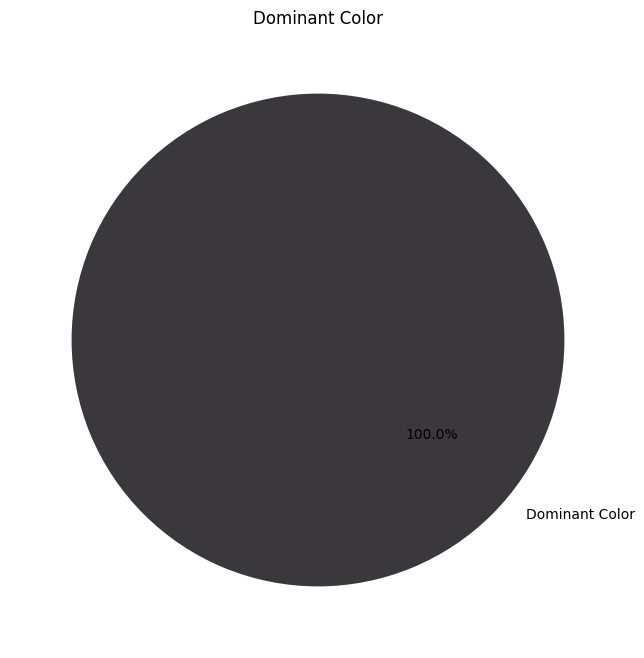

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import colorsys
import os
import pandas as pd
import re

def calculate_distance_hsv_weighted(color1, color2):
    h1, s1, v1 = color1
    h2, s2, v2 = color2

    # Calculate circular distance for Hue, Saturation, and Value
    hue_distance = min(abs(h1 - h2), 360 - abs(h1 - h2))
    saturation_distance = abs(s1 - s2)
    value_distance = abs(v1 - v2)

    # Define weights for each component
    hue_weight = 1.0  # You can experiment with different weights
    saturation_weight = 1.0
    value_weight_white = 2.0  # Higher weight for white color

    # Normalize distances
    max_distance = 360 # Maximum possible distance for hue
    normalized_hue_distance = hue_distance / max_distance
    normalized_saturation_distance = saturation_distance
    normalized_value_distance = value_distance / value_weight_white  # Divide by the weight for white color

    # Calculate weighted distance
    weighted_distance = (
        hue_weight * normalized_hue_distance +
        saturation_weight * normalized_saturation_distance +
        value_weight_white * normalized_value_distance
    )

    return weighted_distance

def find_closest_color_h(color, colors):
    tolerance = 150
    min_distance = tolerance
    closest_color = None
    for color_name, hsv in colors.items():
        distance = calculate_distance_hsv_weighted(color, hsv)
        if distance < min_distance:
            min_distance = distance
            closest_color = color_name
    return closest_color

# สร้าง DataFrame เพื่อเก็บข้อมูล
# data = {'รูปที่': [], 'Closest Predefined Color_HSV': []}

# # กำหนด path ของโฟลเดอร์
image_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\dlgb\12-2_1.png'

# # # ลูปทั้งโฟลเดอร์
# file_list = sorted(os.listdir(folder_path), key=lambda x: (int(re.search(r'(\d+)\.png', x).group(1))))

# Loop through the folder
# for idx, filename in enumerate(file_list):
#     if filename.endswith(".png"):
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
# Perform K-Means clustering
k =8
reshaped_image = image_rgb.reshape((-1, 3))
kmeans = KMeans(n_clusters=k)
kmeans.fit(reshaped_image)

# Get dominant colors
dominant_colors = kmeans.cluster_centers_.astype(int)

# Count the occurrences of each dominant color
counts = np.bincount(kmeans.labels_)

# Find the index of the dominant color excluding black
non_black_indices = [idx for idx, color in enumerate(dominant_colors) if np.mean(color) > 50]        
max_count_index = non_black_indices[np.argmax(counts[non_black_indices])]

# Get the dominant color
dominant_color = dominant_colors[max_count_index]

# Convert dominant color from RGB to HSV
dominant_color_hsv = colorsys.rgb_to_hsv(dominant_color[0]/255.0, dominant_color[1]/255.0, dominant_color[2]/255.0)

# Convert the H value from the range [0, 1] back to [0, 360]
dominant_color_hsv = (dominant_color_hsv[0]*360 , dominant_color_hsv[1], dominant_color_hsv[2])

# เพิ่มค่า V เพื่อทำให้ dominant color สว่างขึ้น
dominant_color_hsv = (dominant_color_hsv[0], dominant_color_hsv[1]+0.1, dominant_color_hsv[2] + 0.1)

# ตรวจสอบว่าค่า V ไม่เกิน 1
dominant_color_hsv = (dominant_color_hsv[0], dominant_color_hsv[1], min(1, dominant_color_hsv[2]))

# Define predefined colors in HSV with fixed Saturation and Value
colors_hsv = {
            "Red": (0, 1.0, 1.0),
            "Orange": (20, 1.0, 1.0),
            "Yellow": (45, 1.0, 1.0),
            "Green": (120, 1.0, 1.0),
            "Cyan": (185, 1.0, 1.0),
            "Blue": (210, 1.0, 1.0),
            "Purple": (285, 1.0, 1.0),
#             "Purple2": (305, 1.0, 1.0),
            "Pink": (330, 1.0, 1.0),
            "Pink2":(310,1.0,1.0),
    
}

# Check if the dominant color is black based on Saturation (S) and Value (V)
if dominant_color_hsv[1] < 0.45 and dominant_color_hsv[2] < 0.45:
    closest_color_h = "Black"
# Check if the dominant color is white based on Saturation (S) and Value (V)
elif dominant_color_hsv[1] < 0.22 and dominant_color_hsv[2] > 0.97:
    closest_color_h = "White"
    
elif dominant_color_hsv[1] <= 0.33 and dominant_color_hsv[2] < 0.81:
    closest_color_h = "Grey"
else:
    # Find the closest predefined color in H, S, and V
    closest_color_h = find_closest_color_h(dominant_color_hsv, colors_hsv)


#         # Add data to DataFramea
#         data['รูปที่'].append(filename)
#         data['Closest Predefined Color_HSV'].append(closest_color_h)

# # Create DataFrame
# df = pd.DataFrame(data)

# # Save to Excel
# output_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\after2_HSV.xlsx'
# df.to_excel(output_path, index=False)

# # Print the dominant color in HSV and its closest predefined color
print(f"Dominant Color H: {dominant_color_hsv}")
print(f"Closest Predefined Color: {closest_color_h}")

# Plot the pie chart with the dominant color
plt.figure(figsize=(8, 8))
plt.pie([counts[max_count_index]], labels=[f"Dominant Color"], colors=['#%02x%02x%02x' % (dominant_color[0], dominant_color[1], dominant_color[2])], autopct='%1.1f%%', startangle=140)
plt.title('Dominant Color')
plt.show()


In [13]:
import cv2
import numpy as np

def process_image(image_path, k=1):
    # อ่านภาพจากไฟล์
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # ตรวจสอบว่าภาพถูกอ่านสำเร็จหรือไม่
    if image is None:
        print("ไม่สามารถอ่านภาพได้")
        return

    # ตรวจสอบค่า Alpha และเก็บค่า RGB ทั้งหมดในลิสต์
    rgb_values = []
    for row in image:
        for pixel in row:
            if pixel[3] != 0:  # ตรวจสอบค่า Alpha ไม่ใช่ 0
                rgb_values.append(pixel[:3])

    # แปลงเป็น numpy array
    rgb_array = np.array(rgb_values, dtype=np.float32)

    # ใช้ K-means เพื่อจัดกลุ่มค่า RGB
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(rgb_array, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # หากใช้ K-means กลุ่มเดียว, เลือกตำแหน่งที่มีความถี่มากที่สุด
    if k == 5:
        most_frequent_rgb = centers[0].astype(np.uint8)
    else:
        # หากใช้ K-means กลุ่มมากกว่าหนึ่ง, ให้เลือกตำแหน่งที่มีจำนวนมากที่สุดในกลุ่ม
        counts = np.bincount(labels.flatten())
        most_frequent_label = np.argmax(counts)
        most_frequent_rgb = centers[most_frequent_label].astype(np.uint8)

    # แสดงค่า RGB ที่มีความถี่มากที่สุด
    print("Most frequent RGB value:", most_frequent_rgb)

if __name__ == "__main__":
    # ระบุตำแหน่งไฟล์ภาพ
    image_path = r"D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\dlgb\2-2_1.png"

    # ประมวลผลภาพ
    process_image(image_path, k=)  # กำหนดจำนวนกลุ่ม (K) ตามที่คุณต้องการ


SyntaxError: invalid syntax (4154199291.py, line 44)

In [149]:
# import os
# import cv2
# import numpy as np
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import math
# import pandas as pd

# # Function to calculate distance between two colors
# def calculate_distance(color1, color2):
#     r1, g1, b1 = color1
#     r2, g2, b2 = color2
#     if r1 < 0 or r2 < 0 or g1 < 0 or g2 < 0 or b1 < 0 or b2 < 0:
#         return float('inf')
    
#     distance = math.sqrt((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2)
#     return distance

# # Function to find closest color from predefined colors
# def find_closest_color(input_color, colors):
#     tolerance = 150
#     min_distance = tolerance
#     closest_color = None
#     for color, rgb in colors.items():
#         distance = calculate_distance(input_color, rgb)
#         if distance < min_distance:
#             min_distance = distance
#             closest_color = color
#     return closest_color

# # Define predefined colors
# colors = {
#     "Red": (255, 51, 51),
#     "Orange": (255, 178, 102),
#     "Yellow": (255, 220, 0),
#     "Green": (130, 255, 51),
#     "Cyan": (50, 200, 200),
#     "Blue": (51, 51, 255),
#     "Purple": (153, 51, 255),
#     "Pink": (230, 70, 150),
#     "Magenta": (255, 102, 255),
#     "White": (255, 255, 255),
#     "Black": (0, 0, 0),
# }

# # Folder path for images
# folder_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\dlgb'

# # Initialize a DataFrame to store the results
# data = {'รูปที่': [], 'Closest Predefined Color_RGB': []}

# # Loop th

rough all images in the folder and sort them based on the pattern
# file_list = sorted(os.listdir(folder_path), key=lambda x: (int(re.search(r'(\d+)-\d+_\d+\.(png)', x).group(1))))
#     if filename.endswith(".png"):
#         image_path = os.path.join(folder_path, filename)

#         # Load the image
#         image = cv2.imread(image_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         # Reshape the image to a 2D array of pixels (rows * columns, 3)
#         reshaped_image = image.reshape((-1, 3))

#         # Perform K-Means clustering
#         k = 5
#         kmeans = KMeans(n_clusters=k)
#         kmeans.fit(reshaped_image)

#         # Get dominant colors
#         dominant_colors = kmeans.cluster_centers_.astype(int)

#         # Count the occurrences of each dominant color
#         counts = np.bincount(kmeans.labels_)

#         # Find the index of the dominant color excluding black
#         non_black_indices = [idx for idx, color in enumerate(dominant_colors) if np.mean(color) > 50]
#         max_count_index = non_black_indices[np.argmax(counts[non_black_indices])]

#         # Get the dominant color
#         dominant_color = dominant_colors[max_count_index]

#         # Find the closest predefined color to the dominant color
#         closest_color = find_closest_color(dominant_color, colors)

#         # Add data to DataFrame
#         data['รูปที่'].append(filename)
#         data['Closest Predefined Color_RGB'].append(closest_color)

# # Convert the data to a DataFrame
# df = pd.DataFrame(data)

# # Save the DataFrame to an Excel file
# output_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\after2_RGB.xlsx'
# df.to_excel(output_path, index=False)


SyntaxError: invalid syntax (2817690782.py, line 54)

In [6]:
input_workbook = openpyxl.load_workbook(r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\after.xlsx')
input_sheet = input_workbook.active

workbook = openpyxl.Workbook()
sheet = workbook.active

sheet['A1'] = 'ชื่อรูป'
# sheet['B1'] = 'Gender'
# sheet['C1'] = 'Brand'
sheet['D1'] = 'สีของรองเท้า'

NameError: name 'openpyxl' is not defined

In [ ]:
# import os
# import cv2
# import numpy as np
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import math
# import pandas as pd
# import re

# # Function to calculate distance between two colors
# def calculate_distance(color1, color2):
#     r1, g1, b1 = color1
# #     r2, g2, b2 = color2
#     if r1 < 0 or r2 < 0 or g1 < 0 or g2 < 0 or b1 < 0 or b2 < 0:
#         return float('inf')
    
#     distance = math.sqrt((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2)
#     return distance

# # Function to find closest color from predefined colors
# def find_closest_color(input_color, colors):
#     tolerance = 150
#     min_distance = tolerance
#     closest_color = None
#     for color, rgb in colors.items():
#         distance = calculate_distance(input_color, rgb)
#         if distance < min_distance:
#             min_distance = distance
#             closest_color = color
#     return closest_color

# # Define predefined colors
# colors = {
#     "Red": (255, 0, 0),
# #     "Orang(sad)":(255,85,0),
#     "Orange": (255, 153, 51),
# #     "Yellow(Kamin)":(255,170,0),
#     "Yellow": (255, 255, 51),
#     "Green": (153, 255, 51),
# #     "Green(RealGreen)":(51,255,51),
# #     "Green(MintGreen)":(51,255,153),
#     "Cyan": (0, 204, 204),
# #     "Blue(RealBlue)":(51,51,255),
#     "Blue": (51, 51, 255),
#     "Purple": (153, 51, 255),
# #     "Purple(Real Purple)":(212,0,255),
#     "Pink": (255, 51, 153),
#     "Magenta": (255, 102, 255),
#     "White": (255, 255, 255),
#     "Black": (0, 0, 0),
# }

# # Folder path for images
# folder_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\output_test2'

# # Initialize a DataFrame to store the results
# data = {'รูปที่': [], 'Closest Predefined Color_RGB': []}

# # Loop through all images in the folder and sort them based on the pattern
# file_list = sorted(os.listdir(folder_path), key=lambda x: (int(re.search(r'(\d+)\.(png)', x).group(1))))
# for filename in file_list:
#     if filename.endswith(".png"):
#         image_path = os.path.join(folder_path, filename)

#         # Load the image
#         image = cv2.imread(image_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#         # Reshape the image to a 2D array of pixels (rows * columns, 3)
#         reshaped_image = image.reshape((-1, 3))

#         # Perform K-Means clustering
#         k = 5
#         kmeans = KMeans(n_clusters=k)
#         kmeans.fit(reshaped_image)

#         # Get dominant colors
#         dominant_colors = kmeans.cluster_centers_.astype(int)

#         # Count the occurrences of each dominant color
#         counts = np.bincount(kmeans.labels_)

#         # Find the index of the dominant color excluding black
#         non_black_indices = [idx for idx, color in enumerate(dominant_colors) if np.mean(color) > 50]
#         max_count_index = non_black_indices[np.argmax(counts[non_black_indices])]

#         # Get the dominant color
#         dominant_color = dominant_colors[max_count_index]

#         # Find the closest predefined color to the dominant color
#         closest_color = find_closest_color(dominant_color, colors)

#         # Add data to DataFrame
#         data['รูปที่'].append(filename)
#         data['Closest Predefined Color_RGB'].append(closest_color)

# # Convert the data to a DataFrame
# df = pd.DataFrame(data)

# # Save the DataFrame to an Excel file
# output_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\after2_RGB01.xlsx'
# df.to_excel(output_path, index=False)


In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math

# Function to calculate distance between two colors
def calculate_distance(color1, color2):
    r1, g1, b1 = color1
    r2, g2, b2 = color2
    distance = math.sqrt((r1 - r2) * 2 + (g1 - g2) * 2 + (b1 - b2) ** 2)
    return distance

# Function to find closest color from predefined colors
def find_closest_color(input_color, colors):
    tolerance = 150
    min_distance = tolerance
    closest_color = None
    for color, rgb in colors.items():
        distance = calculate_distance(input_color, rgb)
        if distance < min_distance:
            min_distance = distance
            closest_color = color
    return closest_color

# Load the image
image_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\output_test2\87-2_2.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels (rows * columns, 3)
reshaped_image = image.reshape((-1, 3))

# Perform K-Means clustering
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(reshaped_image)

# Get dominant colors
dominant_colors = kmeans.cluster_centers_.astype(int)

# Count the occurrences of each dominant color
counts = np.bincount(kmeans.labels_)

# Find the index of the dominant color excluding black
non_black_indices = [idx for idx, color in enumerate(dominant_colors) if np.mean(color) > 50]
max_count_index = non_black_indices[np.argmax(counts[non_black_indices])]

# Get the dominant color
dominant_color = dominant_colors[max_count_index]

# Define predefined colors
colors = {
    "Red": (255, 0, 0),
    "Orange": (255, 128, 0),
    "Yellow": (255, 255, 0),
    "Green": (0, 255, 0),
    "Cyan": (3, 169, 244),
    "Blue": (0, 0, 255),
    "Purple": (163, 44, 196),
    "Pink": (255, 22, 148),
    "White": (255, 255, 255),
    "Black": (0, 0, 0),
}

# Find the closest predefined color to the dominant color
closest_color = find_closest_color(dominant_color, colors)

# Print the dominant color and its closest predefined color
print(f"Dominant Color RGB: {dominant_color}")
print(f"Closest Predefined Color: {closest_color}")

# Plot the pie chart with the dominant color
plt.figure(figsize=(8, 8))
plt.pie([counts[max_count_index]], labels=[f"Dominant Color"], colors=['#%02x%02x%02x' % (dominant_color[0], dominant_color[1], dominant_color[2])], autopct='%1.1f%%', startangle=140)
plt.title('Dominant Color')
plt.show()

In [125]:
colors = {
    "Red": (0, 100, 100),
    "Orange": (24, 100, 100),
    "Yellow": (60, 100, 100),
    "Green": (120, 100, 25),
    "Cyan": (180, 100, 100),
    "Blue": (240, 100, 100),
    "Purple": (300, 100, 50),
    "Pink": (300, 100, 100),
    "White": (0, 0, 100),
    "Black": (0, 0, 0),
}

colors = {
    "Red": (np.array([0, 20, 100]), np.array([0, 100, 100])),
    "Yellow": (np.array([60, 23, 100]), np.array([60, 100, 100])),
    "Green": (np.array([120, 39, 93]), np.array([120, 100, 50])),
    "Blue": (np.array([204, 48, 98]), np.array([240, 100, 100])),
    "Orange": (np.array([33, 43, 100]), np.array([24, 100, 100])),
    "Pink": (np.array([320, 20, 100]), np.array([300, 100, 100])),
    "Cyan": (np.array([180, 12, 100]), np.array([180, 100, 100])),
    "Purple": (np.array([215, 35, 97]), np.array([300, 100, 50])),
}

In [126]:
# from PIL import Image

# # โปรแกรมหาค่าเฉลี่ยของสีในรูปภาพ
# def average_color(image):
#     # เปิดภาพในโหมด RGB
#     img = image.convert("RGB")
#     # หาขนาดของรูป
#     width, height = img.size
#     # ตัวแปรเพื่อเก็บผลลัพธ์
#     total_red = 0
#     total_green = 0
#     total_blue = 0
#     total_pixels = 0
    
#     # วนลูปทุกพิกเซลเพื่อหาค่าเฉลี่ยของสี (ยกเว้นสีดำ)
#     for x in range(width):
#         for y in range(height):
#             r, g, b = img.getpixel((x, y))
#             # ตรวจสอบว่าสีไม่ใช่สีดำ (r, g, b ไม่เท่ากับ (0, 0, 0))
#             if (r, g, b) != (0, 0, 0):
#                 total_red += r
#                 total_green += g
#                 total_blue += b
#                 total_pixels += 1
    
#     # หาค่าเฉลี่ยของสีแต่ละสี (R, G, B)
#     average_red = total_red // total_pixels
#     average_green = total_green // total_pixels
#     average_blue = total_blue // total_pixels
    
#     return average_red, average_green, average_blue

# # โหลดรูปภาพ
# image_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground\36-2_1_de_30.png'  # ระบุ path ของรูปภาพที่ต้องการใช้
# image = Image.open(image_path)

# # หาค่าเฉลี่ยของสีในรูปภาพ
# average_red, average_green, average_blue = average_color(image)

# # แสดงผลลัพธ์
# print(f"Average RGB Color: ({average_red}, {average_green}, {average_blue})")


In [127]:
# from PIL import Image

# # Open an image file
# image_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground\36-2_1_de_30.png'
# image = Image.open(image_path)

# # Get the width and height of the image
# image_width, image_height = image.size

# # Specify valid coordinates within the image range
# x = 50  # choose a valid x-coordinate within the range (0 to image_width - 1)
# y = 100  # choose a valid y-coordinate within the range (0 to image_height - 1)

# # Check if the specified coordinates are within the valid range
# if 0 <= x < image_width and 0 <= y < image_height:
#     # Get the RGB values at the specified pixel
#     rgb_values = image.getpixel((x, y))
#     # Output the RGB values
#     print("RGB values at pixel ({}, {}): {}".format(x, y, rgb_values))
# else:
#     print("Invalid coordinates. The specified pixel is outside the valid range for the image.")


In [128]:
# Mark จุดตรงกลางเเละระบุจุดตรงกลางเป็นสี RGB นั้น

import os
from tkinter import Tk, Canvas, filedialog
from PIL import Image, ImageTk

class ColorPickerApp:
    def __init__(self):
        self.canvas_width = 450
        self.canvas_height = 500
        self.process_images_and_pick_colors()

    def extract_number_from_filename(self, filename):
        # Extract the first number from the filename, ignoring non-digit characters
        digits = ''.join(filter(str.isdigit, filename.split('_')[0]))
        if digits:
            return int(digits)
        return -1  # Return a special value for filenames without numbers

    def process_images_and_pick_colors(self):
        folder_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\ImageBackgroundRemover\static\results'
        output_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\ImageBackgroundRemover\static\results\label_RGB.txt'

        # List to store filename and RGB tuples
        colors = []

        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg') or filename.endswith('.jpg'):  # Assuming images are jpg or png files
                file_path = os.path.join(folder_path, filename)
                image = Image.open(file_path)
                image = image.resize((self.canvas_width, self.canvas_height))
                # Get color at the center of the image
                x, y = self.canvas_width // 2, self.canvas_height // 2
                pixel = image.getpixel((x, y))
                colors.append((filename, pixel))

        # Sort colors based on the first number in the filename
        sorted_colors = sorted(colors, key=lambda x: self.extract_number_from_filename(x[0]))

        with open(output_path, 'w') as file:
            for filename, pixel in sorted_colors:
                file.write(f"{filename}: Selected Color (RGB): {pixel}\n")

if __name__ == "__main__":
    app = ColorPickerApp()
    print("Save label_RGB.txt Success")

Save label_RGB.txt Success


In [129]:
# อ่านไฟล์ label_RGB.txt เเล้วบันทึกสีเป็นไฟล์ .xlsx

import os
import math
import openpyxl

def calculate_distance(color1, color2):
    r1, g1, b1 = color1
    r2, g2, b2 = color2
    distance = math.sqrt((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2)
    return distance

def find_closest_color(input_color, colors):
    tolerance = 150  
    min_distance = tolerance
    closest_color = None
    for color, rgb in colors.items():
        distance = calculate_distance(input_color, rgb)
        if distance < min_distance:
            min_distance = distance
            closest_color = color
    return closest_color

colors = {
    "Red": (255, 0, 0),
    "Orange": (255, 128, 0),
    "Yellow": (255, 255, 0),
    "Green": (0, 255, 0),
    "Cyan": (3, 169, 244),
    "Blue": (0, 0, 255),
    "Purple": (163, 44, 196),
    "Pink": (255, 22, 148),
    "White": (255, 255, 255),
    "Black": (0, 0, 0),
    # "Gray": (128, 128, 128)
}

input_file_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground\label_RGB.txt'

output_file_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground\after2.xlsx'
workbook = openpyxl.Workbook()
sheet = workbook.active

# กำหนดค่าให้กับ cell A1 และ D1
sheet.cell(row=1, column=1, value="ชื่อรูป")
sheet.cell(row=1, column=4, value="สีของรองเท้า")

# อ่านค่าสี RGB จากไฟล์และบันทึกลง Excel
with open(input_file_path, 'r') as file:
    row_num = 2  # เริ่มต้นที่ row ที่ 2 เพราะ row แรกใช้เป็นหัวข้อ
    for line in file:
        filename, rgb_values = line.strip().split(": Selected Color (RGB): ")
        r, g, b, _ = eval(rgb_values)
        input_color = (r, g, b)
        closest_color = find_closest_color(input_color, colors)
        sheet.cell(row=row_num, column=1, value=filename.strip())
        sheet.cell(row=row_num, column=4, value=closest_color)
        row_num += 1

workbook.save(output_file_path)

print("Save after2.xlsx success!!!")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Detection Shoes\\Detect running shoes\\shoe detection\\Real_1\\Shoes-deletebackground\\label_RGB.txt'

In [ ]:
# เพิ่ม Gender - Brand

import openpyxl

# เปิดไฟล์ existing Excel
file_path = r'D:\Detection Shoes\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground\after2.xlsx'
workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active

# เพิ่มข้อมูลในคอลัมน์ B1 และ C1
sheet['B1'] = 'Gender'
sheet['C1'] = 'Brand'

# บันทึกไฟล์
workbook.save(file_path)

print("Update after2.xlsx sucess!!!")

In [119]:
# คิดสี RGB

import math

def calculate_distance(color1, color2):
    r1, g1, b1 = color1
    r2, g2, b2 = color2
    distance = math.sqrt((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2)
    return distance

def find_closest_color(input_color, colors):
    tolerance = 150  # กำหนดค่า tolerance เป็น 140
    min_distance = tolerance
    closest_color = None
    for color, rgb in colors.items():
        distance = calculate_distance(input_color, rgb)
        if distance < min_distance:
            min_distance = distance
            closest_color = color
    return closest_color

# สีที่กำหนด 10 สี
colors = {
    "Red": (255, 0, 0),
    "Orange": (255, 128, 0),
    "Yellow": (255, 255, 0),
    "Green": (0, 255, 0),
    "Cyan": (3, 169, 244),
    "Blue": (0, 0, 255),
    "Purple": (163,44,196),
    "Pink": (255, 22, 148),
    "White": (255, 255, 255),
    "Black": (0, 0, 0),
#     "Gray": (128,128,128)
}

# รับค่าสีจากผู้ใช้
input_r = int(input("ป้อนค่าสีแดง (0-255): "))
input_g = int(input("ป้อนค่าสีเขียว (0-255): "))
input_b = int(input("ป้อนค่าสีน้ำเงิน (0-255): ")) 

# สีที่ป้อนเข้ามา
input_color = (input_r, input_g, input_b)

# หาสีที่ใกล้เคียงที่สุด
closest_color = find_closest_color(input_color, colors)

print(f"สีที่ใกล้เคียงที่สุดคือ: {closest_color}")

ป้อนค่าสีแดง (0-255): 246
ป้อนค่าสีเขียว (0-255): 89
ป้อนค่าสีน้ำเงิน (0-255): 115
สีที่ใกล้เคียงที่สุดคือ: Pink


In [ ]:
# import cv2
# import numpy as np

# # โหลดรูปภาพ
# image_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground\36-2_1_de_30.png'  # ระบุ path ของรูปภาพที่ต้องการใช้
# image = cv2.imread(image_path)

# # แปลงภาพเป็นรูปแบบ HSV (Hue, Saturation, Value)
# hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# # กำหนดช่วงสีต่าง ๆ ในรูปแบบ HSV
# color_ranges = {
#     'Red': ([0, 100, 100], [10, 255, 255]),
#     'Orange': ([11, 100, 100], [20, 255, 255]),
#     'Yellow': ([21, 100, 100], [30, 255, 255]),
#     'Green': ([31, 100, 100], [85, 255, 255]),
#     'Cyan': ([86, 100, 100], [125, 255, 255]),
#     'Blue': ([126, 100, 100], [165, 255, 255]),
#     'Purple': ([166, 100, 100], [250, 255, 255]),
#     'Pink': ([251, 100, 100], [295, 255, 255]),
#     # 'White': ([0, 0, 231], [180, 30, 255]),
#     # 'Black': ([0, 0, 0], [180, 255, 30])
# }

# # นับจำนวนพิกเซลที่ตรงกับแต่ละสี
# color_counts = {}
# for color, (lower_bound, upper_bound) in color_ranges.items():
#     mask = cv2.inRange(hsv_image, np.array(lower_bound), np.array(upper_bound))
#     color_counts[color] = cv2.countNonZero(mask)

# # หาสีที่มีจำนวนพิกเซลมากที่สุด
# dominant_color = max(color_counts, key=color_counts.get)

# print(f"สีที่มีจำนวนพิกเซลมากที่สุดในรูปคือ: {dominant_color}")

In [ ]:
# import cv2
# import numpy as np
# import colorsys

# def get_image_color_codes(image_path):
#     # Read the image
#     image = cv2.imread(image_path)
    
#     # Convert BGR to RGB
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     # Get average color using numpy
#     average_color = np.mean(image_rgb, axis=(0, 1))
    
#     # Get HEX code
#     hex_code = '#{:02x}{:02x}{:02x}'.format(int(average_color[0]), int(average_color[1]), int(average_color[2]))
    
#     # Get RGB code
#     rgb_code = tuple(int(c) for c in average_color)
    
#     # Convert RGB to HSL
#     hsl_code = colorsys.rgb_to_hls(rgb_code[0]/255, rgb_code[1]/255, rgb_code[2]/255)
#     hsl_code = tuple(int(round(c * 100)) for c in hsl_code)  # Scaling to 0-100 range
    
#     return hex_code, rgb_code, hsl_code

# # Example usage
# image_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground\35-2_1_de_29.png'  # ระบุ path ของรูปภาพที่ต้องการใช้
# hex_code, rgb_code, hsl_code = get_image_color_codes(image_path)

# print("HEX Code:", hex_code)
# print("RGB Code:", rgb_code)
# print("HSL Code:", hsl_code)


In [ ]:
import openpyxl

workbook = openpyxl.load_workbook('after2.xlsx')
sheet = workbook.active
sheet['B1'] = 'Gender'
sheet['C1'] = 'Brand'

workbook.save('after2.xlsx')

In [ ]:
df_after = pd.read_excel('after.xlsx')
df_after2 = pd.read_excel('after2.xlsx')

# สร้าง dictionary จาก df_after โดยให้ Crop_File เป็น key และ Gender, Brand เป็น values
crop_file_dict = df_after.set_index('Crop_File')[['Gender', 'Brand']].to_dict(orient='index')

# แปลงทุกค่าใน df_after2 เป็น string
df_after2 = df_after2.applymap(str)

# ตรวจสอบและรับค่า Gender และ Brand จาก df_after แล้วนำมาใส่ใน df_after2
for index, row in df_after2.iterrows():
    image_name = row['ชื่อรูป'].split('_')[0]  # ดึง Crop_File จากชื่อรูป
    if image_name in crop_file_dict:
        gender_value = crop_file_dict[image_name]['Gender']
        brand_value = crop_file_dict[image_name]['Brand']
        if pd.notna(gender_value) and gender_value != '':
            df_after2.at[index, 'Gender'] = gender_value
        if pd.notna(brand_value):
            df_after2.at[index, 'Brand'] = brand_value

# เก็บผลลัพธ์ในไฟล์ output.xlsx
df_after2.to_excel('after3.xlsx', index=False)
print('Save file after3.xlsx success!!!')

In [ ]:
import os
import cv2

# ตั้งค่าพาธไปยังโฟลเดอร์ที่มีไฟล์ label ของ YOLO
labels_folder = r'D:\Detection Shoes\Detect running shoes\yolov5\yolov5\runs\detect\exp\labels'

# ตั้งค่าพาธไปยังโฟลเดอร์ที่มีรูปภาพต้นฉบับ
original_images_folder = r'D:\Detection Shoes\Detect running shoes\shoe detection\my-own\my_own_test3'

def count_shoes_in_image(label_file_path, original_image_path):
    # โหลดขนาดของรูปภาพต้นฉบับ
    original_image = cv2.imread(original_image_path)
    original_height, original_width, _ = original_image.shape

    with open(label_file_path, 'r') as file:
        lines = file.readlines()

    num_shoes = 0

    # วนลูปผ่านทุกบรรทัดในไฟล์ label
    for line in lines:
        line_content = line.strip().split()
        
        # ตรวจสอบว่ามีข้อมูลครบหรือไม่ (ต้องมี 6 ค่า class_id, x_center, y_center, width, height, confidence)
        if len(line_content) == 6:
            class_id, x_center, y_center, width, height, confidence = map(float, line_content)
            
            # แปลงรูปแบบ YOLO เป็นพิกัดพิกเซล
            x, y, w, h = x_center * original_width, y_center * original_height, width * original_width, height * original_height

            # สมมติว่า class_id 0 หมายถึงรองเท้า (แก้ตามคอนฟิกเรื่องคลาสของคุณ)
            if class_id == 0:
                num_shoes += 1

    return num_shoes

def count_shoes_in_folder(labels_folder, original_images_folder):
    num_total_shoes = 0

    # วนลูปผ่านไฟล์ label ในโฟลเดอร์ labels
    for label_file_name in os.listdir(labels_folder):
        label_file_path = os.path.join(labels_folder, label_file_name)

        # รับพาธไปยังไฟล์รูปภาพต้นฉบับที่เกี่ยวข้อง
        original_image_name = label_file_name.replace('.txt', '.jpg')
        original_image_path = os.path.join(original_images_folder, original_image_name)

        # โหลดขนาดของรูปภาพต้นฉบับ
        original_image = cv2.imread(original_image_path)
        original_height, original_width, _ = original_image.shape

        # นับจำนวนรองเท้าในรูปภาพปัจจุบัน
        num_shoes_in_image = count_shoes_in_image(label_file_path, original_image_path)
        num_total_shoes += num_shoes_in_image

        print(f'จำนวนรองเท้าใน {original_image_name}: {num_shoes_in_image}')

    print(f'จำนวนรองเท้าทั้งหมดในทุกรูป: {num_total_shoes}')

# เรียกใช้ฟังก์ชันเพื่อนับจำนวนรองเท้าในทุกรูปภาพในโฟลเดอร์ที่ระบุ
count_shoes_in_folder(labels_folder, original_images_folder)


In [ ]:
# file_list = sorted(os.listdir(folder_path), key=lambda x: (int(re.search(r'de_(\d+)\.png', x).group(1))))

# for idx, filename in enumerate(file_list):
#     if filename.endswith(".png"):
#         # อ่านรูปภาพ
#         img_path = os.path.join(folder_path, filename)
#         img = cv2.imread(img_path)
#         grid_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

#         # ทำการทำนายสี
#         mask_1 = cv2.inRange(grid_HSV, lower_red, upper_red)
#         mask_2 = cv2.inRange(grid_HSV, lower_yellow, upper_yellow)
#         mask_3 = cv2.inRange(grid_HSV, lower_background, upper_background)
#         mask_4 = cv2.inRange(grid_HSV, lower_white, upper_white)
#         mask_5 = cv2.inRange(grid_HSV, lower_green, upper_green)
#         mask_6 = cv2.inRange(grid_HSV, lower_light_blue, upper_light_blue)
#         mask_7 = cv2.inRange(grid_HSV, lower_orange, upper_orange)
#         mask_8 = cv2.inRange(grid_HSV, lower_pink, upper_pink)
#         mask_9 = cv2.inRange(grid_HSV, lower_cyan, upper_cyan)

#         object_mask = mask_1 + mask_2 + mask_4 + mask_5 + mask_6 + mask_7 + mask_8 + mask_9
#         object_mask = cv2.bitwise_and(object_mask, 255 - mask_3)

#         color_areas = {
#             "Red": np.sum(mask_1),
#             "Yellow": np.sum(mask_2),
#             "White": np.sum(mask_4),
#             "Green": np.sum(mask_5),
#             "Light Blue": np.sum(mask_6),
#             "Orange": np.sum(mask_7),
#             "Pink": np.sum(mask_8),
#             "Cyan": np.sum(mask_9)
#         }

#         total_color_value = sum(color_areas.values())

#         if all(value == 0 for value in color_areas.values()):
#             object_color = "ไม่สามารถระบุสีได้"
#         elif total_color_value <= 50000:
#             object_color = "Black"
#         else:
#             object_color = max(color_areas, key=color_areas.get)

#         # ดึงข้อมูลจาก input_sheet
#         gender = input_sheet.cell(row=idx + 2, column=2).value
#         brand = input_sheet.cell(row=idx + 2, column=3).value

#         # เพิ่มข้อมูลลงใน Excel
#         sheet.append([filename, gender, brand, object_color])

# # บันทึกไฟล์ Excel
# workbook.save(r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\after2.xlsx')
# print('Save file after2.xlse success!!!')

In [ ]:
# import cv2
# import numpy as np
# import os
# import openpyxl
# import re

# # โหลดไฟล์ Excel ที่ต้องการดึงข้อมูล
# input_workbook = openpyxl.load_workbook(r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\after.xlsx')
# input_sheet = input_workbook.active

# # สร้างไฟล์ Excel สำหรับเก็บข้อมูลใหม่
# workbook = openpyxl.Workbook()
# sheet = workbook.active
# sheet['A1'] = 'ชื่อรูป'
# sheet['B1'] = 'Gender'
# sheet['C1'] = 'Brand'
# sheet['D1'] = 'สีของรองเท้า'

# # ระบุตำแหน่งของโฟลเดอร์ที่มีรูปภาพ
# folder_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-deletebackground'

# # กำหนดค่าสีต่างๆ
# lower_red = np.array([0, 150, 50])
# upper_red = np.array([10, 255, 255])
# lower_yellow = np.array([25, 150, 50])
# upper_yellow = np.array([35, 255, 255])
# lower_background = np.array([0, 0, 0])
# upper_background = np.array([250, 255, 30])
# lower_white = np.array([0, 0, 255])
# upper_white = np.array([0, 0, 255])
# lower_green = np.array([45, 150, 50])
# upper_green = np.array([65, 255, 255])
# lower_light_blue = np.array([95, 150, 0])
# upper_light_blue = np.array([110, 255, 255])
# lower_orange = np.array([15, 150, 0])
# upper_orange = np.array([25, 255, 255])
# lower_pink = np.array([145, 150, 0])
# upper_pink = np.array([155, 255, 255])
# lower_cyan = np.array([85, 150, 0])
# upper_cyan = np.array([95, 255, 255])

# # วนลูปผ่านทุกรูปภาพในโฟลเดอร์
# # เรียงลำดับไฟล์ตามตัวเลขที่อยู่หลัง 'de_' และก่อน '.png'
# file_list = sorted(os.listdir(folder_path), key=lambda x: (int(re.search(r'de_(\d+)\.png', x).group(1))))

# for idx, filename in enumerate(file_list):
#     if filename.endswith(".png"):
#         # อ่านรูปภาพ
#         img_path = os.path.join(folder_path, filename)
#         img = cv2.imread(img_path)
#         grid_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

#         # ทำการทำนายสี
#         mask_1 = cv2.inRange(grid_HSV, lower_red, upper_red)
#         mask_2 = cv2.inRange(grid_HSV, lower_yellow, upper_yellow)
#         mask_3 = cv2.inRange(grid_HSV, lower_background, upper_background)
#         mask_4 = cv2.inRange(grid_HSV, lower_white, upper_white)
#         mask_5 = cv2.inRange(grid_HSV, lower_green, upper_green)
#         mask_6 = cv2.inRange(grid_HSV, lower_light_blue, upper_light_blue)
#         mask_7 = cv2.inRange(grid_HSV, lower_orange, upper_orange)
#         mask_8 = cv2.inRange(grid_HSV, lower_pink, upper_pink)
#         mask_9 = cv2.inRange(grid_HSV, lower_cyan, upper_cyan)

#         object_mask = mask_1 + mask_2 + mask_4 + mask_5 + mask_6 + mask_7 + mask_8 + mask_9
#         object_mask = cv2.bitwise_and(object_mask, 255 - mask_3)

#         color_areas = {
#             "Red": np.sum(mask_1),
#             "Yellow": np.sum(mask_2),
#             "White": np.sum(mask_4),
#             "Green": np.sum(mask_5),
#             "Light Blue": np.sum(mask_6),
#             "Orange": np.sum(mask_7),
#             "Pink": np.sum(mask_8),
#             "Cyan": np.sum(mask_9)
#         }

#         total_color_value = sum(color_areas.values())

#         if all(value == 0 for value in color_areas.values()):
#             object_color = "ไม่สามารถระบุสีได้"
#         elif total_color_value <= 50000:
#             object_color = "Black"
#         else:
#             object_color = max(color_areas, key=color_areas.get)

#         # ดึงข้อมูลจาก input_sheet
#         gender = input_sheet.cell(row=idx + 2, column=2).value
#         brand = input_sheet.cell(row=idx + 2, column=3).value

#         # เพิ่มข้อมูลลงใน Excel
#         sheet.append([filename, gender, brand, object_color])

# # บันทึกไฟล์ Excel
# workbook.save(r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\after2.xlsx')
# print('Save file after2.xlse success!!!')

In [ ]:
# import cv2
# import numpy as np

# # กำหนดที่อยู่ของรูปภาพ
# image_path = 'F:\\intern\\model_shoes_detection\\Detect running shoes\\shoe detection\\Real_1\\Shoes-crop\\3-2_1.jpg'

# # อ่านรูปภาพ
# image = cv2.imread(image_path)

# # ตรวจสอบว่าสามารถอ่านรูปภาพได้
# if image is not None:
#     # สร้างลิสต์เพื่อเก็บค่าสี RGB
#     rgb_colors = []

#     # วนลูปผ่านทุกพิกเซลในรูปภาพ
#     height, width, _ = image.shape
#     for y in range(height):
#         for x in range(width):
#             # ดึงค่าสีของแต่ละพิกเซล (BGR)
#             b, g, r = image[y, x]

#             # เพิ่มค่าสี RGB ลงในลิสต์
#             rgb_colors.append((r, g, b))

#     # บันทึกข้อมูลสีลงในไฟล์ .txt
#     output_file = 'colors.txt'
#     with open(output_file, 'w') as file:
#         for color in rgb_colors:
#             file.write(f"{color[0]}, {color[1]}, {color[2]}\n")

#     print(f"บันทึกสีลงในไฟล์ {output_file} เรียบร้อยแล้ว")
# else:
#     print("ไม่สามารถอ่านรูปภาพได้")


In [ ]:
# import cv2
# import numpy as np
# import os

# # กำหนดโฟลเดอร์ที่มีรูปภาพ
# folder_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-crop'

In [ ]:
# # รายการเก็บค่า mean color ของแต่ละรูป
# mean_colors = []

# # วนลูปผ่านไฟล์รูปทั้งหมดในโฟลเดอร์
# for filename in os.listdir(folder_path):
#     if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
#         # อ่านภาพ
#         image_path = os.path.join(folder_path, filename)
#         image = cv2.imread(image_path)
        
#         # ตรวจสอบว่าสามารถอ่านรูปภาพได้
#         if image is not None:
#             # คำนวณค่าสีเฉลี่ย
#             mean_color = np.mean(image, axis=(0, 1))
#             mean_colors.append(mean_color)
#         else:
#             print(f"ไม่สามารถอ่านรูปภาพ {filename} ได้")

In [ ]:
# # บันทึกผลลัพธ์เป็นไฟล์ .txt
# output_file = 'mean_colors.txt'
# with open(output_file, 'w') as file:
#     for mean_color in mean_colors:
#         # แปลงสีจาก BGR เป็น RGB และเขียนลงในไฟล์ในรูปแบบของข้อความ
#         mean_color_rgb = mean_color[::-1]
#         file.write(f"Mean Color (RGB): {mean_color_rgb[0]:.2f}, {mean_color_rgb[1]:.2f}, {mean_color_rgb[2]:.2f}\n")

# print(f"บันทึกค่า mean color ลงในไฟล์ {output_file} เรียบร้อยแล้ว")

In [ ]:
# import os
# import requests

# api_key = '52DC8T7NrkYcjE9Hmfk5CVJq'  # ใส่ API Key ที่คุณได้รับจาก Remove.bg
# input_image_folder = 'F:\\intern\\model_shoes_detection\\Detect running shoes\\shoe detection\\Real_1\\Shoes-crop'
# output_image_folder = 'F:\\intern\\model_shoes_detection\\Detect running shoes\\shoe detection\\Real_1\\Shoes-removebg'

# # Create the output folder if it doesn't exist
# os.makedirs(output_image_folder, exist_ok=True)

# # Iterate through the input images
# for image_filename in os.listdir(input_image_folder):
#     if image_filename.endswith(('.jpg', '.jpeg', '.png')):
#         image_path = os.path.join(input_image_folder, image_filename)

#         # Create the API request
#         response = requests.post(
#             'https://api.remove.bg/v1.0/removebg',
#             headers={'X-Api-Key': api_key},
#             files={'image_url': (None, 'file:///' + os.path.abspath(image_path))}
#         )

#         # Check the status of the request
#         if response.status_code == requests.codes.ok:
#             # Save the resulting image with the background removed
#             output_path = os.path.join(output_image_folder, image_filename)
#             with open(output_path, 'wb') as out:
#                 out.write(response.content)
#             print(f'Background removed successfully for {image_filename}')
#         else:
#             print(f'Error removing background for {image_filename}: {response.status_code}')

# print("Background removal completed. Resulting images saved to:", output_image_folder)


In [ ]:
# import torch
# import torchvision.models as models

# model_save_path = 'F:/intern/model_shoes_detection/Detect running shoes/shoe detection/resnet50.pth'

# # ดาวน์โหลดโมเดล ResNet-50
# resnet50 = models.resnet50(pretrained=True)

# torch.save(resnet50.state_dict(), model_save_path)

In [ ]:
# import os
# from PIL import Image
# import torch
# import torchvision.models.detection as detection_models
# import torchvision.transforms as transforms
# import numpy as np

# # Define the path to the directory containing the models
# model_dir = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection'

# # Load the pre-trained Faster R-CNN model
# faster_rcnn_model_path = os.path.join(model_dir, 'faster_rcnn_model.pth')
# faster_rcnn_model = detection_models.fasterrcnn_resnet50_fpn(pretrained=False)
# faster_rcnn_model.load_state_dict(torch.load(faster_rcnn_model_path))
# faster_rcnn_model.eval()  # Set the model to evaluation mode

# # Load the pre-trained ResNet-50 model for color classification
# resnet50_model_path = os.path.join(model_dir, 'resnet50.pth')
# resnet50 = torch.hub.load('pytorch/vision', 'resnet50', pretrained=False)
# resnet50.load_state_dict(torch.load(resnet50_model_path))
# resnet50.eval()  # Set the ResNet-50 model to evaluation mode

# # Define a transformation to preprocess images for ResNet-50
# preprocess_resnet = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])

In [ ]:
# Colors_List = { # 84 87 58

#     'Black' : (0,0,0), # 84 87 58
#     'White' : (255,255,255), # 
#     'Red' : (255,0,0),
#     'Lime' : (0,255,0),
#     'Blue' : (0,0,255),
#     'Yellow' : (255,255,0),
#     'Aqua' : (0,255,255),
#     'Magenta' : (255,0,255),
#     'Silver' : (192,192,192),
#     'Gray' : (128,128,128),
#     'Maroon' : (128,0,0),
#     'Dark red' : (139,0,0),
#     'Brown' : (165,42,42),
#     'Firebrick' : (178,34,34),
#     'crimson' : (220,20,60),
#     'tomato' : (255,99,71),
#     'coral' : (255,127,80),
#     'indian red' : (205,92,92),
#     'light coral' : (240,128,128),
#     'dark salmon' : (233,150,122),
#     'salmon' : (250,128,114),
#     'light salmon' : (255,160,122),
#     'orange red' : (255,69,0),
#     'dark orange' : (255,140,0),
#     'orange' : 	(255,165,0),
#     'gold' : 	(255,215,0),
#     'dark golden rod' : 	(184,134,11),
#     'golden rod' : (218,165,32),
#     'pale golden rod' : (238,232,170),
#     'dark khaki' : (189,183,107),
#     'khaki' : (240,230,140),
#     'olive' : (128,128,0),
#     'yellow green' : (154,205,50),
#     'dark olive green' : (85,107,47),
#     'olive drab' : (107,142,35),
#     'lawn green' : (124,252,0),
#     'chartreuse' : (127,255,0),
#     'green yellow' : (173,255,47),
#     'dark green' : (0,100,0),
#     'green' : (0,128,0),
#     'forest green' : (34,139,34),
#     'lime' : (0,255,0),
#     'lime green' : (50,205,50),
#     'light green' : (144,238,144),
#     'pale green' : (152,251,152),
#     'dark sea green' : (143,188,143),
#     'medium spring green' : (0,250,154),
#     'spring green' : (0,255,127),
#     'sea green' : (46,139,87),
#     'medium aqua marine' : (102,205,170),
#     'medium sea green' : (60,179,113),
#     'light sea green' : (32,178,170),
#     'dark slate gray' : (47,79,79),
#     'teal' : (0,128,128),
#     'dark cyan' : (0,139,139),
#     'aqua' : (0,255,255),
#     'cyan' : (0,255,255),
#     'light cyan' : (224,255,255),
#     'dark turquoise' : (0,206,209),
#     'turquoise' : (64,224,208),
#     'pale turquoise' : (175,238,238),
#     'aqua marine' : (127,255,212),
#     'powder blue' : (176,224,230),
#     'cadet blue' : (95,158,160),
#     'steel blue' : (70,130,180),
#     'corn flower blue' : (100,149,237),
#     'deep sky blue' : (0,191,255),
#     'dodger blue' : (30,144,255),
#     'light blue' : (173,216,230),
#     'sky blue' : (135,206,235),
#     'light sky blue' : (135,206,250),
#     'midnight blue' : (25,25,112),
#     'navy' : (0,0,128),
#     'dark blue' : (0,0,139),
#     'medium blue' : (0,0,205),
#     'blue' : (0,0,255),
#     'royal blue' : (65,105,225),
#     'blue violet' : (138,43,226),
#     'indigo' : (75,0,130),
#     'dark slate blue' : (72,61,139),
#     'slate blue' : (106,90,205),
#     'medium slate blue' : (123,104,238),
#     'medium purple' : (147,112,219),
#     'dark magenta' : (139,0,139),
#     'dark violet' : (148,0,211),
#     'dark orchid' : (153,50,204),
#     'medium orchid' : (186,85,211),
#     'purple' : (128,0,128),
#     'thistle' : (216,191,216),
#     'plum' : (221,160,221),
#     'violet' : (238,130,238),
#     'magenta / fuchsia' : (255,0,255),
#     'orchid' : (218,112,214),
#     'medium violet red' : (199,21,133),
#     'pale violet red' : (219,112,147),
#     'deep pink' : (255,20,147),
#     'hot pink' : (255,105,180),
#     'light pink' : (255,182,193),
#     'pink' : (255,192,203),
#     'antique white' : (250,235,215),
#     'beige' : (245,245,220),
#     'bisque' : (255,228,196),
#     'blanched almond' : (255,235,205),
#     'wheat' : (245,222,179),
#     'corn silk' : (255,248,220),
#     'lemon chiffon' : (255,250,205),
#     'light golden rod yellow' : (250,250,210),
#     'light yellow' : (255,255,224),
#     'saddle brown' : (139,69,19),
#     'sienna' : (160,82,45),
#     'chocolate' : (210,105,30),
#     'peru' : (205,133,63),
#     'sandy brown' : (244,164,96),
#     'burly wood' : (222,184,135),
#     'tan' : (210,180,140),
#     'rosy brown' : (188,143,143),
#     'moccasin' : (255,228,181),
#     'navajo white' : (255,222,173),
#     'peach puff' : (255,218,185),
#     'misty rose' : (255,228,225),
#     'lavender blush' : (255,240,245),
#     'linen' : (250,240,230),
#     'old lace' : (253,245,230),
#     'papaya whip' : (255,239,213),
#     'sea shell' : (255,245,238),
#     'mint cream' : (245,255,250),
#     'slate gray' : (112,128,144),
#     'light slate gray' : (119,136,153),
#     'light steel blue' : (176,196,222),
#     'lavender' : (230,230,250),
#     'floral white' : (255,250,240),
#     'alice blue' : (240,248,255),
#     'ghost white' : (248,248,255),
#     'honeydew' : (240,255,240),
#     'ivory' : (255,255,240),
#     'azure' : (240,255,255),
#     'snow' : (255,250,250),
#     'dim gray / dim grey' : (105,105,105),
#     'gray / grey' : (128,128,128),
#     'dark gray / dark grey' : (169,169,169),
#     'silver' : (192,192,192),
#     'light gray / light grey' : (211,211,211),
#     'gainsboro' : (220,220,220),
#     'white smoke' : (245,245,245),
  
# }

In [ ]:
# # Create a list to store the detected and classified shoes
# detected_and_classified_shoes = []

# # Specify the directory containing shoe images
# image_dir = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\Shoes-removebg'

# for file_name in os.listdir(image_dir):
#     if file_name.lower().endswith('.jpg'):
#         image_path = os.path.join(image_dir, file_name)

#         # Detect objects in the image using Faster R-CNN
#         image = Image.open(image_path).convert('RGB')
#         image_tensor = transforms.ToTensor()(image).unsqueeze(0)
#         with torch.no_grad():
#             detections = faster_rcnn_model(image_tensor)

#         # Assuming that detections is a dictionary with 'boxes' and 'labels' keys
#         # For simplicity, let's assume we are interested in the first detected object
#         if len(detections[0]['labels']) > 0:
#             box = detections[0]['boxes'][0]
#             label = detections[0]['labels'][0].item()

#             # Crop the detected object
#             box = box.cpu().numpy()  # Convert box coordinates to a NumPy array
#             cropped_image = image.crop((box[0], box[1], box[2], box[3]))

#             # Preprocess the cropped image for ResNet-50
#             cropped_image_tensor = preprocess_resnet(cropped_image)
#             cropped_image_tensor = cropped_image_tensor.unsqueeze(0)

#             # Perform color classification using ResNet-50
#             with torch.no_grad():
#                 output = resnet50(cropped_image_tensor)

#             _, predicted_class = output.max(1)
#             color_index = predicted_class.item()

#             color_list = list(Colors_List.keys())

#             if color_index < len(color_list):
#                 predicted_color = color_list[color_index]
#             else:
#                 predicted_color = "Unknown Color"

#             # Append the detected and classified shoe information
#             detected_and_classified_shoes.append({
#                 'Image_File': file_name,
#                 'Label': label,
#                 'Box': box.tolist(),
#                 'Predicted_Color': predicted_color
#             })

#             # Print the message for object detection and color classification
#             print(f'Object detected in {file_name}: {label}')
#             print(f'Color classified for {file_name}: {predicted_color}')

# # Print or process the detected and classified shoes as needed
# for shoe in detected_and_classified_shoes:
#     print(f'Image File: {shoe["Image_File"]}, Label: {shoe["Label"]}, Box: {shoe["Box"]}, Predicted Color: {shoe["Predicted_Color"]}')


In [ ]:
# # Read data from 'after.xlsx'
# excel_data = pd.read_excel('after.xlsx')

# # Create a DataFrame for shoe detection results
# df_detection = pd.DataFrame(detected_and_classified_shoes)
# df_detection = df_detection.rename(columns={'Image_File': 'Crop_File', 'Predicted_Color': 'Color'})

# # Extract 'Gender' and 'Brand' data from 'after.xlsx'
# excel_data = excel_data[['Gender', 'Brand']]

# # Merge data from shoe detection and 'after.xlsx'
# result_df = pd.concat([df_detection, excel_data], axis=1)

# output_path = r'F:\intern\model_shoes_detection\Detect running shoes\shoe detection\Real_1\after2.xlsx'
# result_df.to_excel(output_path, index=False)

In [ ]:
# shoes_color_data = {'Crop_File': [], 'Color': []}

# # Specify the directory containing shoe images
# image_dir = 'F:/intern/model_shoes_detection/Detect running shoes/shoe detection/Real_1/Shoes-crop/'

# # Iterate through the image files in the directory
# for file_name in os.listdir(image_dir):
#     if file_name.lower().endswith('.jpg'):
#         image_path = os.path.join(image_dir, file_name)
#         predicted_color = predict_color(image_path)
#         shoes_color_data['Crop_File'].append(file_name)
#         shoes_color_data['Color'].append(predicted_color)

# # Read the original DataFrame from 'after.xlsx'
# original_df = pd.read_excel('after.xlsx')

# # Merge the color predictions DataFrame with the original DataFrame based on 'Crop_File'
# merged_df = original_df.merge(pd.DataFrame(shoes_color_data), on='Crop_File', how='left')

# # Save the updated DataFrame to 'after2.xlsx'
# merged_df.to_excel('after2.xlsx', index=False)

In [ ]:
# from PIL import Image
# from torchvision import transforms
# import numpy as np
# import math
# import torch

# def find_most_frequent_color(image_path):
#     # Load the image
#     image = Image.open(image_path)
    
#     # Convert the image to RGB color space
#     image = image.convert('RGB')
    
#     # Get the pixel data
#     pixels = image.getdata()
    
#     # Count the frequency of each color
#     color_counter = Counter(pixels)
    
#     # Find the most common color and its frequency
#     most_common_color = color_counter.most_common(1)[0]
    
#     return most_common_color[0]

# def find_closest_color(rgb_value, color_list):
#     min_distance = math.inf
#     closest_color = None

#     for color_name in color_list:
#         color_rgb = color_list[color_name]
#         # Calculate the Euclidean distance between the RGB values
#         distance = math.sqrt(sum((c1 - c2) ** 2 for c1, c2 in zip(rgb_value, color_rgb)))
#         if distance < min_distance:
#             min_distance = distance
#             closest_color = color_name

#     return closest_color

In [ ]:
# Colors_List = { # 84 87 58

#     'Black' : (0,0,0), # 84 87 58
#     'White' : (255,255,255), # 
#     'Red' : (255,0,0),
#     'Lime' : (0,255,0),
#     'Blue' : (0,0,255),
#     'Yellow' : (255,255,0),
#     'Aqua' : (0,255,255),
#     'Magenta' : (255,0,255),
#     'Silver' : (192,192,192),
#     'Gray' : (128,128,128),
#     'Maroon' : (128,0,0),
#     'Dark red' : (139,0,0),
#     'Brown' : (165,42,42),
#     'Firebrick' : (178,34,34),
#     'crimson' : (220,20,60),
#     'tomato' : (255,99,71),
#     'coral' : (255,127,80),
#     'indian red' : (205,92,92),
#     'light coral' : (240,128,128),
#     'dark salmon' : (233,150,122),
#     'salmon' : (250,128,114),
#     'light salmon' : (255,160,122),
#     'orange red' : (255,69,0),
#     'dark orange' : (255,140,0),
#     'orange' : 	(255,165,0),
#     'gold' : 	(255,215,0),
#     'dark golden rod' : 	(184,134,11),
#     'golden rod' : (218,165,32),
#     'pale golden rod' : (238,232,170),
#     'dark khaki' : (189,183,107),
#     'khaki' : (240,230,140),
#     'olive' : (128,128,0),
#     'yellow green' : (154,205,50),
#     'dark olive green' : (85,107,47),
#     'olive drab' : (107,142,35),
#     'lawn green' : (124,252,0),
#     'chartreuse' : (127,255,0),
#     'green yellow' : 	(173,255,47),
#     'dark green' : (0,100,0),
#     'green' : (0,128,0),
#     'forest green' : (34,139,34),
#     'lime' : (0,255,0),
#     'lime green' : (50,205,50),
#     'light green' : (144,238,144),
#     'pale green' : (152,251,152),
#     'dark sea green' : (143,188,143),
#     'medium spring green' : (0,250,154),
#     'spring green' : (0,255,127),
#     'sea green' : (46,139,87),
#     'medium aqua marine' : (102,205,170),
#     'medium sea green' : (60,179,113),
#     'light sea green' : (32,178,170),
#     'dark slate gray' : (47,79,79),
#     'teal' : (0,128,128),
#     'dark cyan' : (0,139,139),
#     'aqua' : (0,255,255),
#     'cyan' : (0,255,255),
#     'light cyan' : (224,255,255),
#     'dark turquoise' : (0,206,209),
#     'turquoise' : (64,224,208),
#     'pale turquoise' : (175,238,238),
#     'aqua marine' : (127,255,212),
#     'powder blue' : (176,224,230),
#     'cadet blue' : (95,158,160),
#     'steel blue' : (70,130,180),
#     'corn flower blue' : (100,149,237),
#     'deep sky blue' : (0,191,255),
#     'dodger blue' : (30,144,255),
#     'light blue' : (173,216,230),
#     'sky blue' : (135,206,235),
#     'light sky blue' : (135,206,250),
#     'midnight blue' : (25,25,112),
#     'navy' : (0,0,128),
#     'dark blue' : (0,0,139),
#     'medium blue' : (0,0,205),
#     'blue' : (0,0,255),
#     'royal blue' : (65,105,225),
#     'blue violet' : (138,43,226),
#     'indigo' : (75,0,130),
#     'dark slate blue' : (72,61,139),
#     'slate blue' : (106,90,205),
#     'medium slate blue' : (123,104,238),
#     'medium purple' : (147,112,219),
#     'dark magenta' : (139,0,139),
#     'dark violet' : (148,0,211),
#     'dark orchid' : (153,50,204),
#     'medium orchid' : (186,85,211),
#     'purple' : (128,0,128),
#     'thistle' : (216,191,216),
#     'plum' : (221,160,221),
#     'violet' : (238,130,238),
#     'magenta / fuchsia' : (255,0,255),
#     'orchid' : (218,112,214),
#     'medium violet red' : (199,21,133),
#     'pale violet red' : (219,112,147),
#     'deep pink' : (255,20,147),
#     'hot pink' : (255,105,180),
#     'light pink' : (255,182,193),
#     'pink' : (255,192,203),
#     'antique white' : (250,235,215),
#     'beige' : (245,245,220),
#     'bisque' : (255,228,196),
#     'blanched almond' : (255,235,205),
#     'wheat' : (245,222,179),
#     'corn silk' : (255,248,220),
#     'lemon chiffon' : (255,250,205),
#     'light golden rod yellow' : (250,250,210),
#     'light yellow' : (255,255,224),
#     'saddle brown' : (139,69,19),
#     'sienna' : (160,82,45),
#     'chocolate' : (210,105,30),
#     'peru' : (205,133,63),
#     'sandy brown' : (244,164,96),
#     'burly wood' : (222,184,135),
#     'tan' : (210,180,140),
#     'rosy brown' : (188,143,143),
#     'moccasin' : (255,228,181),
#     'navajo white' : (255,222,173),
#     'peach puff' : (255,218,185),
#     'misty rose' : (255,228,225),
#     'lavender blush' : (255,240,245),
#     'linen' : (250,240,230),
#     'old lace' : (253,245,230),
#     'papaya whip' : (255,239,213),
#     'sea shell' : (255,245,238),
#     'mint cream' : (245,255,250),
#     'slate gray' : (112,128,144),
#     'light slate gray' : (119,136,153),
#     'light steel blue' : (176,196,222),
#     'lavender' : (230,230,250),
#     'floral white' : (255,250,240),
#     'alice blue' : (240,248,255),
#     'ghost white' : (248,248,255),
#     'honeydew' : (240,255,240),
#     'ivory' : (255,255,240),
#     'azure' : (240,255,255),
#     'snow' : (255,250,250),
#     'dim gray / dim grey' : (105,105,105),
#     'gray / grey' : (128,128,128),
#     'dark gray / dark grey' : (169,169,169),
#     'silver' : (192,192,192),
#     'light gray / light grey' : (211,211,211),
#     'gainsboro' : (220,220,220),
#     'white smoke' : (245,245,245),
  
# }

In [ ]:
# def get_gender_and_brand(file_name):
#     # ตัดข้อความ 'Crop_' และ '.JPG' จากชื่อไฟล์
#     name = file_name.replace('Crop_', '').replace('.JPG', '')
    
#     # แยกชื่อเข้าด้วยเครื่องหมาย '-'
#     parts = name.split('-')
    
#     if len(parts) == 2:
#         gender, brand = parts
#         if gender.lower() == 'male' or gender.lower() == 'female':
#             return gender.capitalize(), brand  # Capitalize the gender
#     return 'Unknown', brand

In [ ]:
# import os
# from collections import Counter
# import pandas as pd

# def count_shoe_colors(image_path, threshold=100):
#     rgb = find_most_frequent_color(image_path)
#     closest_clr = find_closest_color(rgb, Colors_List)
#     print(f"Image: {image_path}, RGB: {rgb}, Closest Color: {closest_clr}")
#     return f"{closest_clr} {rgb}", closest_clr

# shoes_color_data = {}

# for file_name in os.listdir('F:\\intern\\model_shoes_detection\\Detect running shoes\\shoe detection\\Real_1\\Shoes-crop\\'):
#     if file_name.lower().endswith('jpg'):
#         image_path = os.path.join('F:\\intern\\model_shoes_detection\\Detect running shoes\\shoe detection\\Real_1\\Shoes-crop\\', file_name)
#         color = count_shoe_colors(image_path)
#         shoes_color_data[file_name] = color

# color_counts = Counter(shoes_color_data.values())

# new_data = {'Crop_File': [], 'Gender': [], 'Brand': [], 'Color': [], 'Counts': []}

# for file_name, color in shoes_color_data.items():
#     if color is not None:
#         gender, brand = get_gender_and_brand(file_name)
#         color_info, color_name = count_shoe_colors(image_path)  # Get color name and RGB value
#         count = color_counts[color_name]
#         new_data['Crop_File'].append(file_name)
#         new_data['Gender'].append(gender)
#         new_data['Brand'].append(brand)
#         new_data['Color'].append(color_info)  # Store color name and RGB value
#         new_data['Counts'].append(f'{count} คู่')
        
# original_df = pd.read_excel('after.xlsx')

# new_df = pd.DataFrame(new_data)

# new_df['Gender'] = original_df['Gender']
# new_df['Brand'] = original_df['Brand']

# new_df.to_excel('after2.xlsx', index=False)

In [ ]:
# -------------------------------------------------------

In [ ]:
# -------------------------------------------------------

In [ ]:
# yolov5 = r'F:\intern\model_shoes_detection\Detect running shoes\yolov5\yolov5'
# os.chdir(yolov5)

In [ ]:
# !python detect.py --weights "F:\\intern\\model_shoes_detection\\Detect running shoes\\yolov5m_Objects365.pt" --source "F:\\intern\\model_shoes_detection\\Detect running shoes\\shoe detection\\my-own\\my_own_test3" --imgsz 416 --conf 0.7 --save-txt --save-conf

In [ ]:
# import os
# import pandas as pd

# # กำหนดตำแหน่งของไฟล์ labels
# labels_folder = "F:\\intern\\model_shoes_detection\\Detect running shoes\\yolov5\\yolov5\\runs\\detect\\exp3\\"

# # สร้างโครงข้อมูลสำหรับบันทึกข้อมูล
# data = {'Image': [], 'Color': [], 'Gender': [], 'Num_People': []}

# for filename in os.listdir(labels_folder):
#     if filename.endswith(".txt"):
#         with open(os.path.join(labels_folder, filename), 'r') as file:
#             lines = file.readlines()
#             if lines:
#                 image_name = os.path.splitext(filename)[0] + ".jpg"
#                 color = lines[0].strip()  # สีอยู่บรรทัดแรกของไฟล์ labels

#                 # ให้เพิ่มโค้ดนี้เพื่อนับจำนวนคนในภาพ
#                 img_path = os.path.join(source_folder, image_name)
#                 img = cv2.imread(img_path)
#                 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#                 face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#                 faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
#                 num_people = len(faces)

#                 # เพิ่มข้อมูลลงใน DataFrame
#                 data['Image'].append(image_name)
#                 data['Color'].append(color)
#                 data['Gender'].append(gender)  # ผลการทำนายเพศ
#                 data['Num_People'].append(num_people)  # จำนวนคน

# # สร้าง DataFrame จากข้อมูล
# df = pd.DataFrame(data)

# # บันทึกลงในไฟล์ Excel
# output_file = "shoe_colors.xlsx"
# df.to_excel(output_file, index=False)

# # ยืนยันที่ไฟล์ถูกบันทึก
# print(f"บันทึกข้อมูลลงในไฟล์ {output_file} เรียบร้อยแล้ว")


In [ ]:
# -------------------------------------------------

In [ ]:
# -------------------------------------------------

Work on in later ^^^

In [ ]:
# data = bio_dict
# df = pd.DataFrame.from_dict(data, orient='index', columns=['Gender','Brand'])
# df.to_excel('after2.xlsx', index_label='Crop_File')